In [1]:
## import libraries to ignore warnies
import warnings
warnings.filterwarnings('ignore')

In [2]:
## import libraries

import pandas as pd 
#import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [3]:
#input data
## use filepath/data location

Data = pd.read_csv("/Users/Downloads/WLD_RTFP_country_2023-10-02.csv")


# Data preparation 

In [4]:
#validate data inputted

Data

,Open,High,Low,Close,Inflation,country,ISO3,date
0,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-01-01
1,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-02-01
2,0.54,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-03-01
3,0.53,0.55,0.53,0.55,NaN,Afghanistan,AFG,2007-04-01
4,0.56,0.57,0.56,0.57,NaN,Afghanistan,AFG,2007-05-01
...,...,...,...,...,...,...,...,...
4793,2.74,2.78,2.70,2.75,-0.28,"Yemen, Rep.",YEM,2023-06-01
4794,2.79,2.83,2.75,2.81,-1.85,"Yemen, Rep.",YEM,2023-07-01
4795,2.85,2.89,2.81,2.83,-3.17,"Yemen, Rep.",YEM,2023-08-01
4796,2.86,2.97,2.82,2.97,1.68,"Yemen, Rep.",YEM,2023-09-01


In [5]:
#Examing data from csv file noticed no inflation data from Jan-Dec 2007. 


display(Data.loc[(Data['country']=='Nigeria') & (Data['date'] <= '2007-12-01')])


display(Data.loc[(Data['country']=='Nigeria') & (Data['date'] > '2007-12-01')])


,Open,High,Low,Close,Inflation,country,ISO3,date
3456,0.51,0.51,0.49,0.51,NaN,Nigeria,NGA,2007-01-01
3457,0.50,0.51,0.47,0.47,NaN,Nigeria,NGA,2007-02-01
3458,0.45,0.47,0.44,0.47,NaN,Nigeria,NGA,2007-03-01
3459,0.47,0.48,0.46,0.46,NaN,Nigeria,NGA,2007-04-01
3460,0.46,0.47,0.45,0.46,NaN,Nigeria,NGA,2007-05-01
3461,0.46,0.47,0.45,0.46,NaN,Nigeria,NGA,2007-06-01
3462,0.46,0.47,0.45,0.46,NaN,Nigeria,NGA,2007-07-01
3463,0.46,0.47,0.46,0.47,NaN,Nigeria,NGA,2007-08-01
3464,0.48,0.49,0.47,0.48,NaN,Nigeria,NGA,2007-09-01
3465,0.48,0.52,0.47,0.52,NaN,Nigeria,NGA,2007-10-01


,Open,High,Low,Close,Inflation,country,ISO3,date
3468,0.58,0.61,0.57,0.61,21.11,Nigeria,NGA,2008-01-01
3469,0.64,0.66,0.62,0.62,32.49,Nigeria,NGA,2008-02-01
3470,0.63,0.64,0.61,0.62,32.65,Nigeria,NGA,2008-03-01
3471,0.62,0.63,0.61,0.61,32.94,Nigeria,NGA,2008-04-01
3472,0.61,0.62,0.59,0.62,34.75,Nigeria,NGA,2008-05-01
...,...,...,...,...,...,...,...,...
3653,1.86,1.92,1.82,1.92,11.02,Nigeria,NGA,2023-06-01
3654,1.96,2.00,1.92,1.98,11.45,Nigeria,NGA,2023-07-01
3655,2.02,2.06,1.98,1.98,11.83,Nigeria,NGA,2023-08-01
3656,1.99,2.03,1.95,1.95,12.33,Nigeria,NGA,2023-09-01


In [6]:
# Data consist of various countries, filter the data by selecting Nigeria, dropping unwanted column
#ISO3 =country name Abbrv. and deleting known missing value rows. 

NigData = (Data.loc[(Data['country']=='Nigeria') & 
                    (Data['date']> '2007-12-01')]) 
NigData = NigData.drop(columns=['ISO3','country'])

In [7]:
NigData


,Open,High,Low,Close,Inflation,date
3468,0.58,0.61,0.57,0.61,21.11,2008-01-01
3469,0.64,0.66,0.62,0.62,32.49,2008-02-01
3470,0.63,0.64,0.61,0.62,32.65,2008-03-01
3471,0.62,0.63,0.61,0.61,32.94,2008-04-01
3472,0.61,0.62,0.59,0.62,34.75,2008-05-01
...,...,...,...,...,...,...
3653,1.86,1.92,1.82,1.92,11.02,2023-06-01
3654,1.96,2.00,1.92,1.98,11.45,2023-07-01
3655,2.02,2.06,1.98,1.98,11.83,2023-08-01
3656,1.99,2.03,1.95,1.95,12.33,2023-09-01


In [8]:
# checking the null values in dataset
NigData.isnull().sum()


Open         0
High         0
Low          0
Close        0
Inflation    0
date         0
dtype: int64

In [9]:
# checking the datatypes
NigData.dtypes


Open         float64
High         float64
Low          float64
Close        float64
Inflation    float64
date          object
dtype: object

In [10]:
#convert our date column object to datetime

NigData['date'] = pd.to_datetime(NigData['date'])



In [11]:
# Validating datetime change 
NigData.dtypes


Open                float64
High                float64
Low                 float64
Close               float64
Inflation           float64
date         datetime64[ns]
dtype: object

In [12]:
# checking and drop duplicates if any- No duplucates 

NigData.drop_duplicates()


,Open,High,Low,Close,Inflation,date
3468,0.58,0.61,0.57,0.61,21.11,2008-01-01
3469,0.64,0.66,0.62,0.62,32.49,2008-02-01
3470,0.63,0.64,0.61,0.62,32.65,2008-03-01
3471,0.62,0.63,0.61,0.61,32.94,2008-04-01
3472,0.61,0.62,0.59,0.62,34.75,2008-05-01
...,...,...,...,...,...,...
3653,1.86,1.92,1.82,1.92,11.02,2023-06-01
3654,1.96,2.00,1.92,1.98,11.45,2023-07-01
3655,2.02,2.06,1.98,1.98,11.83,2023-08-01
3656,1.99,2.03,1.95,1.95,12.33,2023-09-01


In [13]:
#Describing data --- Year of min and max inflations

NigData.describe()


,Open,High,Low,Close,Inflation
count,190.000000,190.000000,190.000000,190.000000,190.000000
mean,0.945263,0.968842,0.922579,0.945105,11.210526
std,0.403294,0.412335,0.395182,0.403276,24.472839
min,0.550000,0.560000,0.540000,0.550000,-22.710000
25%,0.642500,0.660000,0.622500,0.640000,-5.190000
50%,0.760000,0.785000,0.750000,0.760000,3.765000
75%,1.110000,1.145000,1.072500,1.085000,23.497500
max,2.020000,2.060000,1.980000,1.980000,77.390000


In [14]:
#Data manipulation

# date Extracting Components:
NigData['date'] = pd.to_datetime(NigData['date'])
NigData['year'] = NigData['date'].dt.year
NigData['month'] = NigData['date'].dt.month
NigData


,Open,High,Low,Close,Inflation,date,year,month
3468,0.58,0.61,0.57,0.61,21.11,2008-01-01,2008,1
3469,0.64,0.66,0.62,0.62,32.49,2008-02-01,2008,2
3470,0.63,0.64,0.61,0.62,32.65,2008-03-01,2008,3
3471,0.62,0.63,0.61,0.61,32.94,2008-04-01,2008,4
3472,0.61,0.62,0.59,0.62,34.75,2008-05-01,2008,5
...,...,...,...,...,...,...,...,...
3653,1.86,1.92,1.82,1.92,11.02,2023-06-01,2023,6
3654,1.96,2.00,1.92,1.98,11.45,2023-07-01,2023,7
3655,2.02,2.06,1.98,1.98,11.83,2023-08-01,2023,8
3656,1.99,2.03,1.95,1.95,12.33,2023-09-01,2023,9


In [15]:
#making date an index as this is a time-series data

NigData.set_index('date', inplace=True)



In [16]:
NigData


,Open,High,Low,Close,Inflation,year,month
date,,,,,,,
2008-01-01,0.58,0.61,0.57,0.61,21.11,2008,1
2008-02-01,0.64,0.66,0.62,0.62,32.49,2008,2
2008-03-01,0.63,0.64,0.61,0.62,32.65,2008,3
2008-04-01,0.62,0.63,0.61,0.61,32.94,2008,4
2008-05-01,0.61,0.62,0.59,0.62,34.75,2008,5
...,...,...,...,...,...,...,...
2023-06-01,1.86,1.92,1.82,1.92,11.02,2023,6
2023-07-01,1.96,2.00,1.92,1.98,11.45,2023,7
2023-08-01,2.02,2.06,1.98,1.98,11.83,2023,8


# EDA 

In [17]:
#Describing data --- Year of min and max inflations

NigData.describe()

,Open,High,Low,Close,Inflation,year,month
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,0.945263,0.968842,0.922579,0.945105,11.210526,2015.421053,6.447368
std,0.403294,0.412335,0.395182,0.403276,24.472839,4.581026,3.440326
min,0.550000,0.560000,0.540000,0.550000,-22.710000,2008.000000,1.000000
25%,0.642500,0.660000,0.622500,0.640000,-5.190000,2011.250000,3.250000
50%,0.760000,0.785000,0.750000,0.760000,3.765000,2015.000000,6.000000
75%,1.110000,1.145000,1.072500,1.085000,23.497500,2019.000000,9.000000
max,2.020000,2.060000,1.980000,1.980000,77.390000,2023.000000,12.000000


In [18]:
#Confirming min inflation value month and year
NigData[NigData['Inflation']  == -22.710000]

,Open,High,Low,Close,Inflation,year,month
date,,,,,,,
2019-07-01,0.77,0.79,0.76,0.78,-22.71,2019,7


In [19]:
#Confirming max inflation value month and year
NigData[NigData['Inflation']  == 77.390000]


,Open,High,Low,Close,Inflation,year,month
date,,,,,,,
2017-01-01,0.99,1.06,0.97,1.06,77.39,2017,1


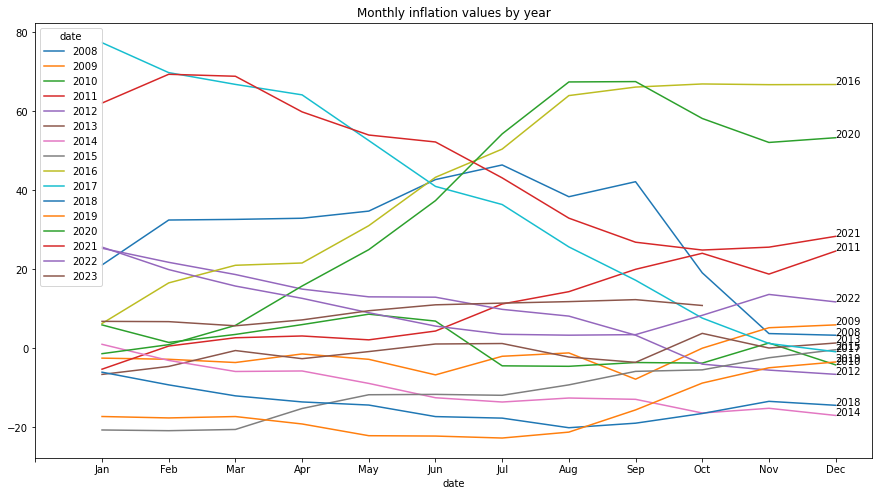

In [20]:
#plotting Monthly inflation values by year'

import calendar

ts = NigData['Inflation']

df_plot = ts.groupby([ts.index.month,ts.index.year]).sum().unstack()
df_plot

fig, ax = plt.subplots(figsize=(15,8))
df_plot.plot(ax=ax,legend=True)
plt.title ('Monthly inflation values by year')

# xticks
months = [calendar.month_abbr[i] for i in range(0,13)]
ax.set_xticks(range(13))
ax.set_xticklabels(months)

# plot names in the end
for col in df_plot.columns:
    plt.annotate(col,xy=(plt.xticks()[0][-1]+0.0, df_plot[col].iloc[-1]))

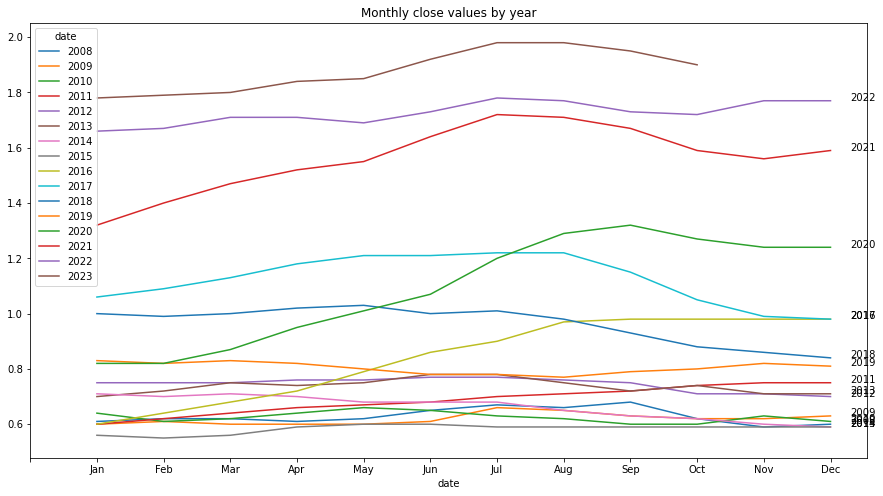

In [21]:
#plotting Monthly close values by year'

to = NigData['Close']

do_plot = to.groupby([to.index.month,ts.index.year]).sum().unstack()
do_plot

fig, ax = plt.subplots(figsize=(15,8))
do_plot.plot(ax=ax,legend=True)  
plt.title ('Monthly close values by year')

# xticks
months = [calendar.month_abbr[i] for i in range(0,13)]
ax.set_xticks(range(13))
ax.set_xticklabels(months)

# plot names in the end
for col in df_plot.columns:
    plt.annotate(col,xy=(plt.xticks()[0][-1]+0.3, do_plot[col].iloc[-1]))

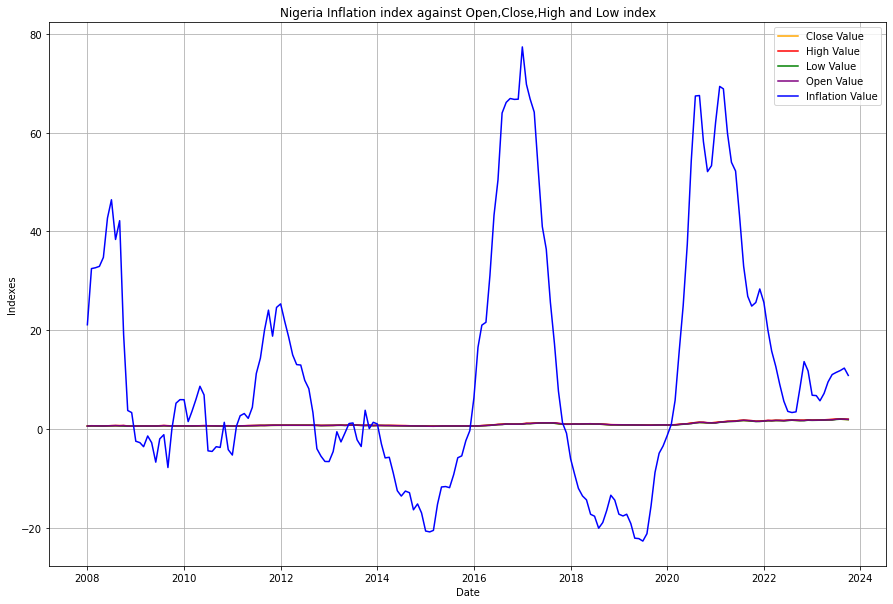

In [22]:
#Plotting inflation index

plt.figure(figsize=(15, 10))
plt.plot(NigData['Close'], label='Close Value', color='orange')
plt.plot(NigData['High'], label='High Value', color='red')
plt.plot(NigData['Low'], label='Low Value', color='green')
plt.plot(NigData['Open'], label='Open Value', color='purple')
plt.plot(NigData['Inflation'], label='Inflation Value', color='Blue')
plt.title('Nigeria Inflation index against Open,Close,High and Low index')
plt.xlabel('Date')
plt.ylabel('Indexes')
plt.legend()
plt.grid(True)
plt.show()

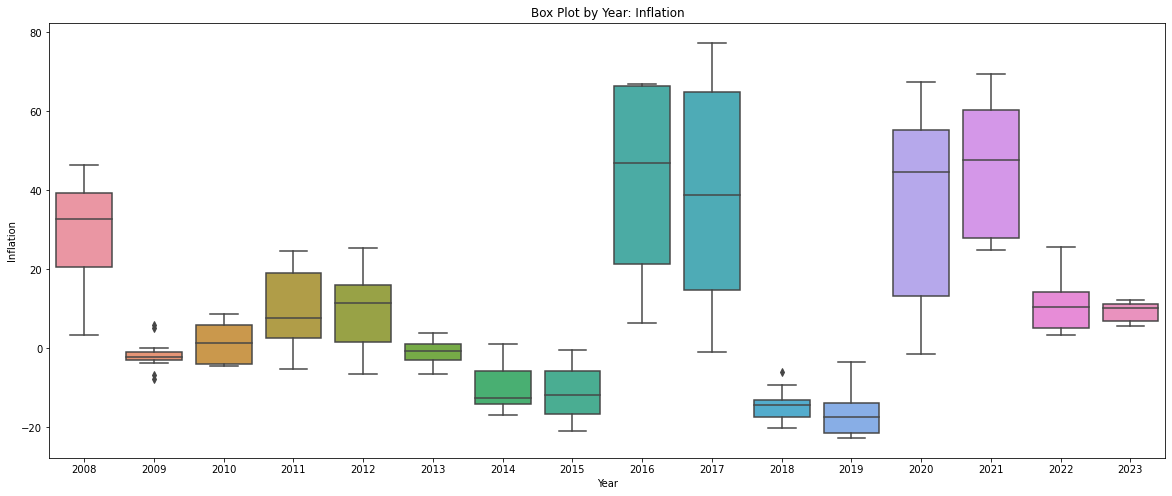

In [23]:
#Box plot for Inflation variable

plt.figure(figsize=(20, 8))
sns.boxplot(x='year',y='Inflation', data=NigData)
plt.title('Box Plot by Year: Inflation')
plt.xlabel('Year')
plt.ylabel('Inflation')
plt.show()

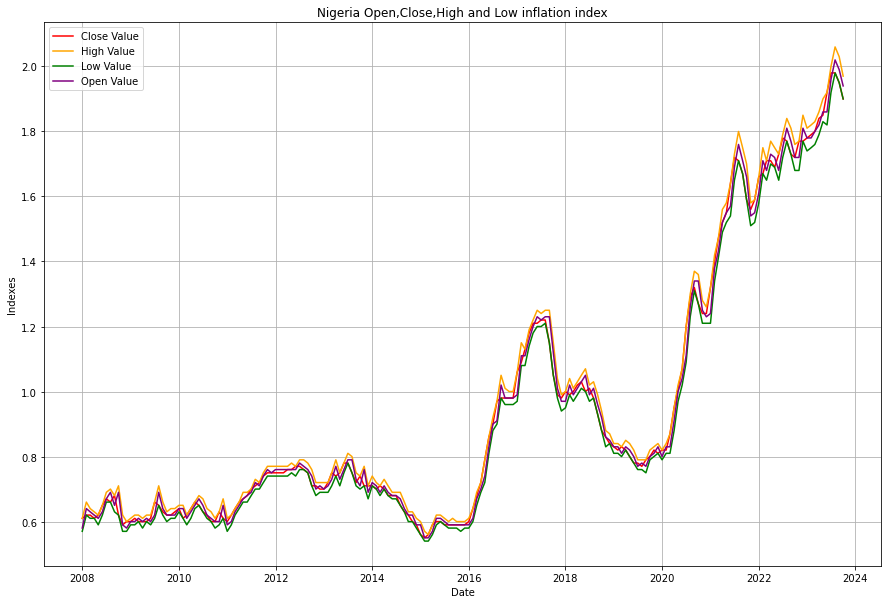

In [24]:
#Plotting Open,Close,High and Low inflation index

plt.figure(figsize=(15, 10))
plt.plot(NigData['Close'], label='Close Value', color='red')
plt.plot(NigData['High'], label='High Value', color='orange')
plt.plot(NigData['Low'], label='Low Value', color='green')
plt.plot(NigData['Open'], label='Open Value', color='purple')
plt.title('Nigeria Open,Close,High and Low inflation index')
plt.xlabel('Date')
plt.ylabel('Indexes')
plt.legend()
plt.grid(True)
plt.show()

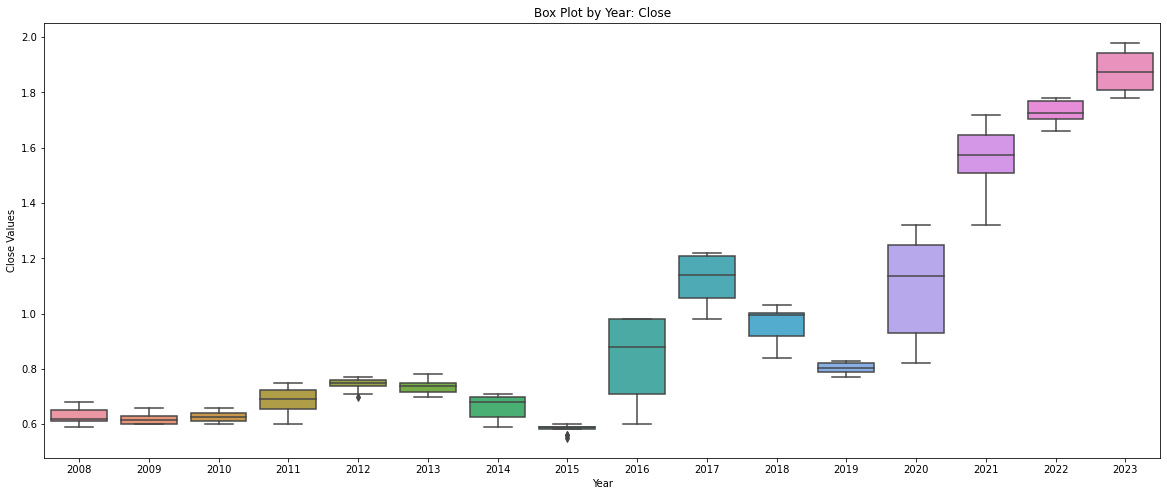

In [25]:
#Box plot for close variable

plt.figure(figsize=(20, 8))
sns.boxplot(x='year', y='Close', data= NigData)
plt.title('Box Plot by Year: Close')
plt.xlabel('Year')
plt.ylabel('Close Values')
plt.show()



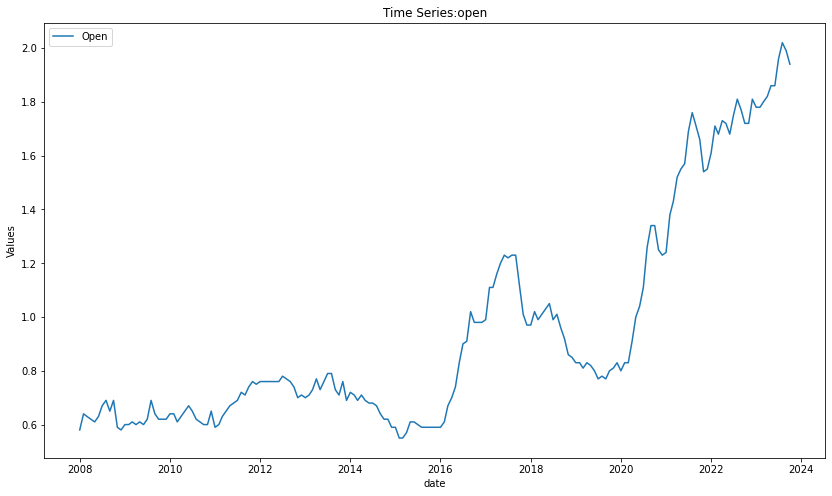

In [26]:
#Plotting open series

plt.figure(figsize=(14, 8))
plt.plot(NigData['Open'],label='Open')
plt.title('Time Series:open')
plt.xlabel('date')
plt.ylabel('Values')
plt.legend()
plt.show()


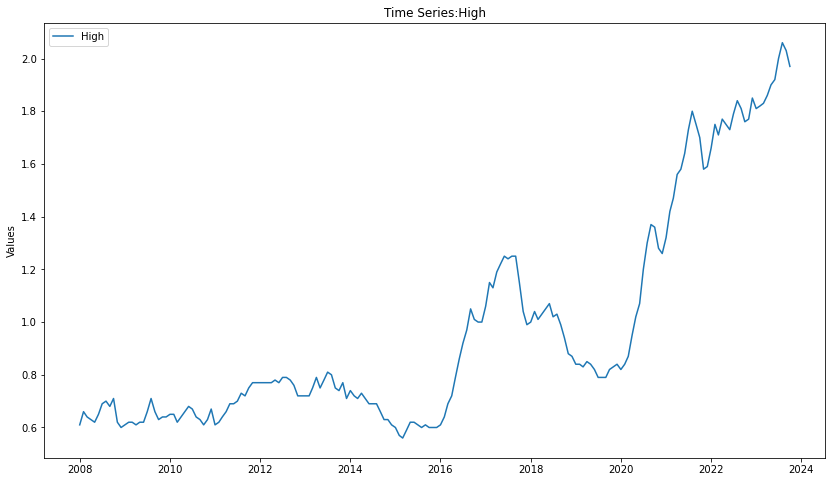

In [27]:
#Plotting High series

plt.figure(figsize=(14, 8))
plt.plot(NigData['High'], label='High')
plt.title('Time Series:High')
#plt.xlabel('date')
plt.ylabel('Values')
plt.legend()
plt.show()


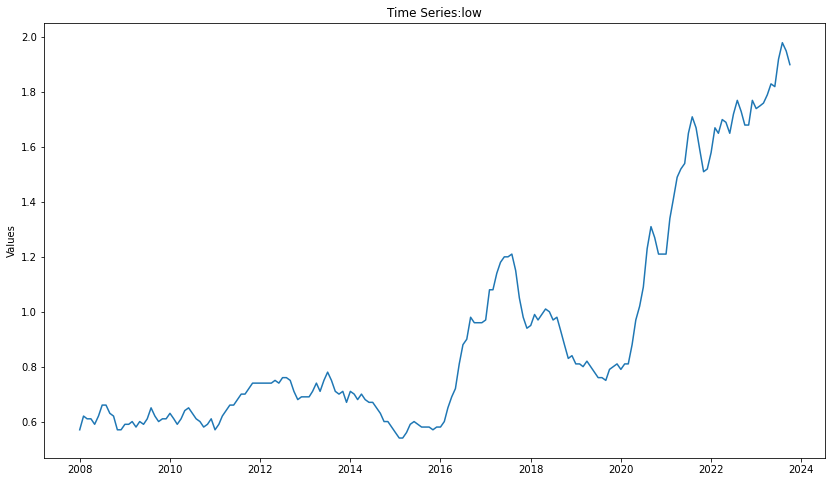

In [28]:
#Plotting Low series

plt.figure(figsize=(14, 8))
plt.plot(NigData['Low'], label='low')
plt.title('Time Series:low')
#plt.xlabel('date')
plt.ylabel('Values')
plt.show()


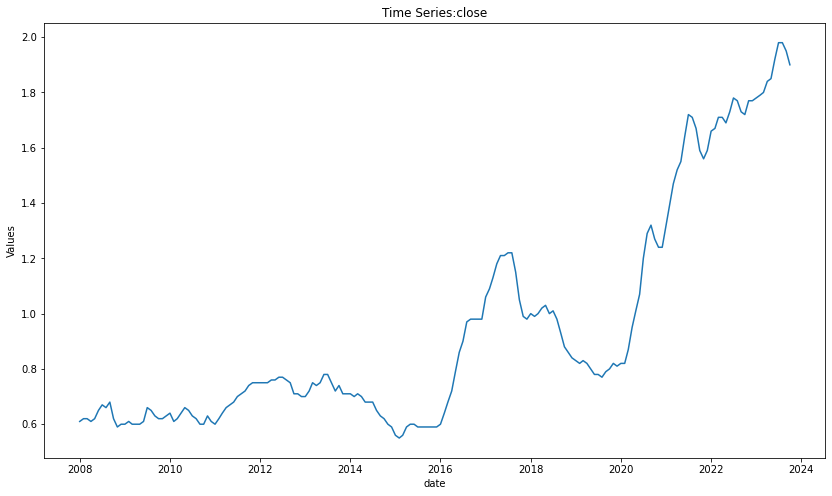

In [29]:
#Plotting Close series
plt.figure(figsize=(14, 8))
plt.plot(NigData['Close'], label='Close')
plt.title('Time Series:close')
plt.xlabel('date')
plt.ylabel('Values')
plt.show()


# Feature selection and testing 

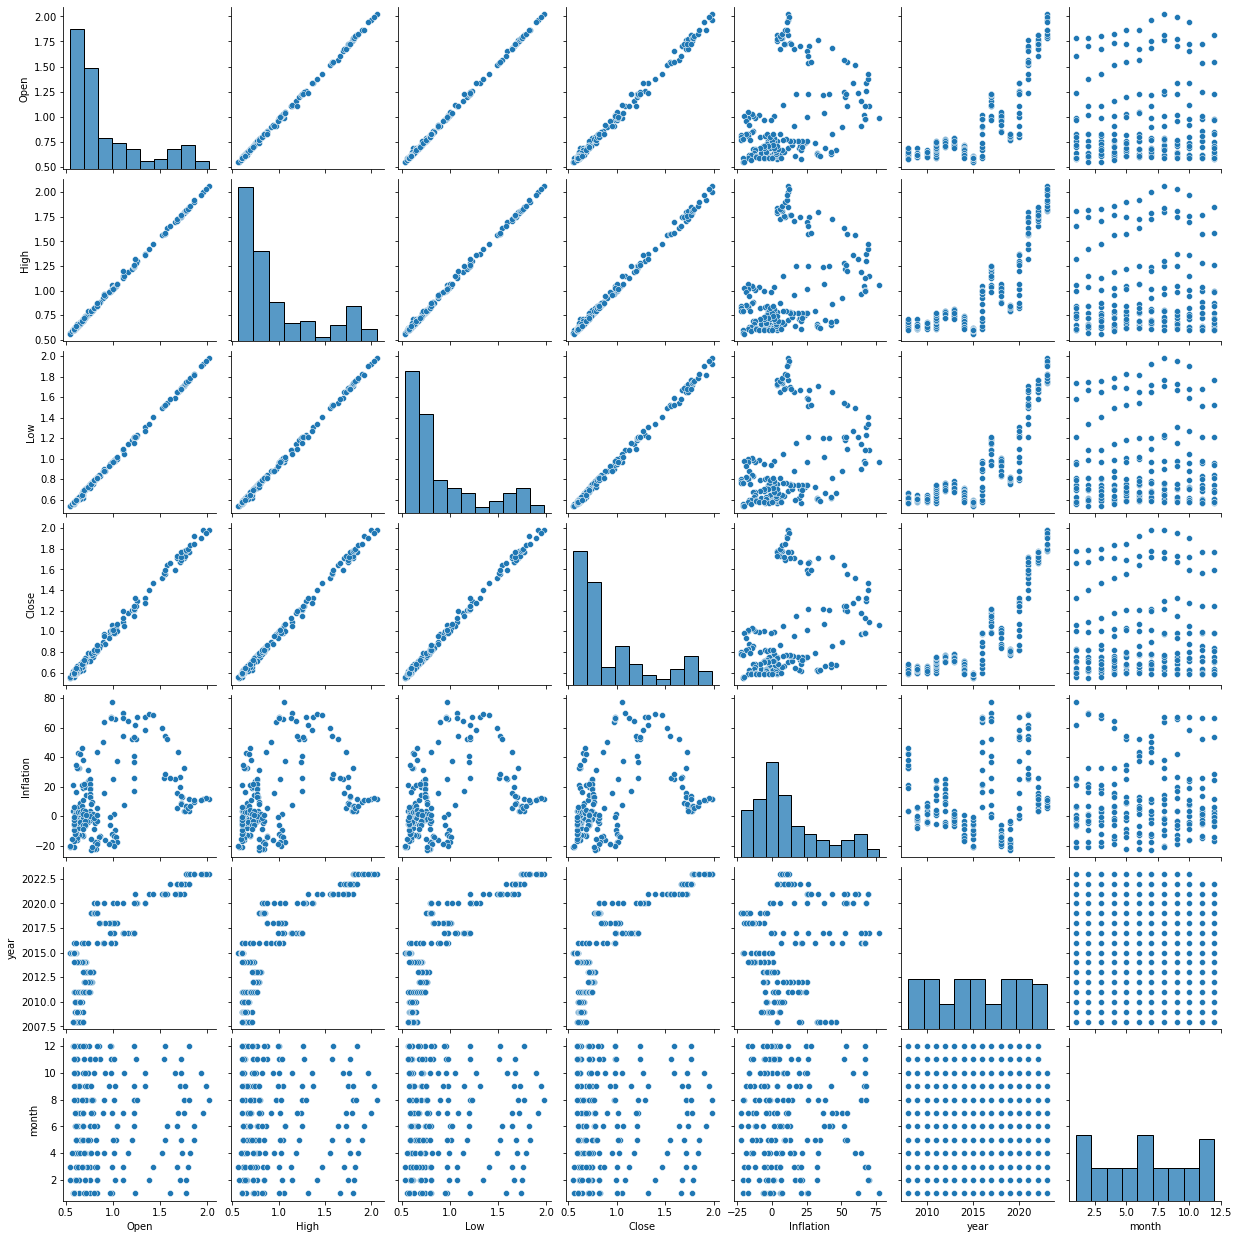

In [30]:
#Pairplot of all variables

sns.pairplot(NigData[['Open', 'High', 'Low','Close', 'Inflation','year','month']])


plt.show()

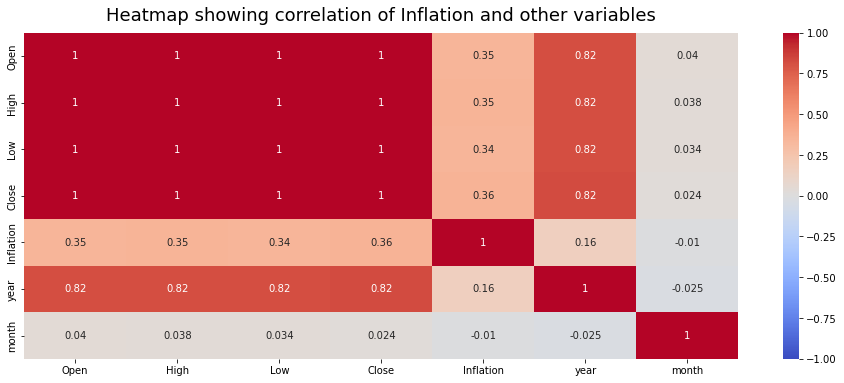

In [31]:
# Correlation by Heatmap

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(NigData.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Heatmap showing correlation of Inflation and other variables', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')


Text(0.5, 1.0, 'Features Correlating with Inflation')

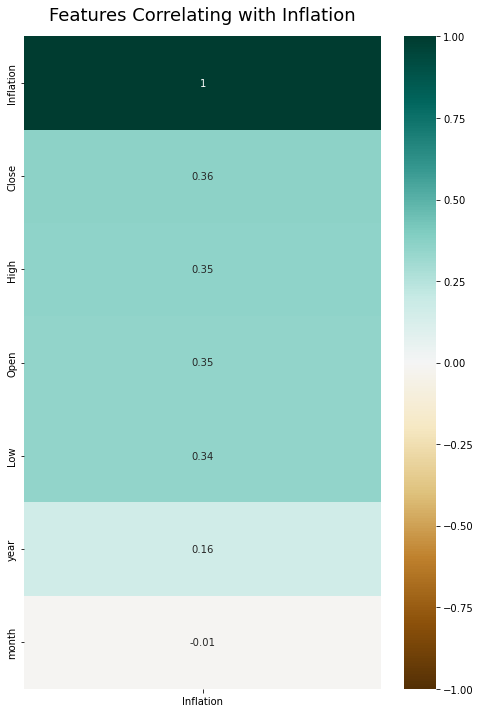

In [32]:
# Correlation by Heatmap

import seaborn as sns

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(NigData.corr()[['Inflation']].sort_values(by='Inflation', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Inflation', fontdict={'fontsize':18}, pad=16)



In [33]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [34]:
#splitting test/train to train gradient boosting

x = NigData[['Open', 'High', 'Low','Close','year','month']]
y = NigData['Inflation']
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=30) 



In [35]:
#Train gradient boosting for feature importance

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100)


[0]	validation_0-rmse:27.35638	validation_1-rmse:22.68405
[100]	validation_0-rmse:16.30149	validation_1-rmse:14.72447
[200]	validation_0-rmse:11.54170	validation_1-rmse:11.99255
[300]	validation_0-rmse:9.00370	validation_1-rmse:9.96251
[400]	validation_0-rmse:7.44376	validation_1-rmse:8.88482
[500]	validation_0-rmse:6.43860	validation_1-rmse:8.50751
[600]	validation_0-rmse:5.62716	validation_1-rmse:8.19358
[700]	validation_0-rmse:4.96249	validation_1-rmse:7.90363
[800]	validation_0-rmse:4.38732	validation_1-rmse:7.64217
[900]	validation_0-rmse:4.02986	validation_1-rmse:7.43054
[999]	validation_0-rmse:3.77756	validation_1-rmse:7.33103


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

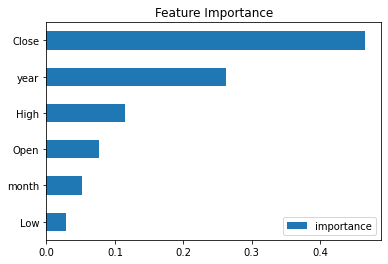

In [36]:
#feature importance 

fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()


In [37]:
#Splitting dataframe for close and inflation only

ND = NigData[["Close","Inflation"]]  



In [38]:
#validating new df
ND

,Close,Inflation
date,,
2008-01-01,0.61,21.11
2008-02-01,0.62,32.49
2008-03-01,0.62,32.65
2008-04-01,0.61,32.94
2008-05-01,0.62,34.75
...,...,...
2023-06-01,1.92,11.02
2023-07-01,1.98,11.45
2023-08-01,1.98,11.83


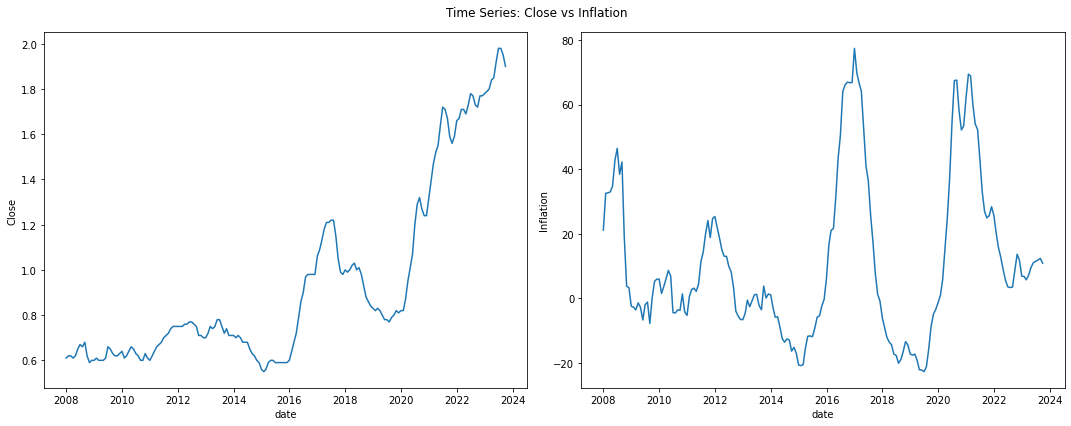

In [39]:
#plotting inflation and close to see similarities

y1 = ND['Close']
y2 = ND['Inflation']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax[0].plot(y1)
ax[1].plot(y2)


for ax[0] in ax.flat:
    ax[0].set(xlabel='date')
    ax[0].set(ylabel='Close')
    ax[1].set(ylabel='Inflation')

fig.suptitle('Time Series: Close vs Inflation')
fig.tight_layout()


In [40]:
# Performing granger casuality test 
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests

def grangers_causation_matrix(ND, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(ND[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df



In [41]:
maxlag=12
grangers_causation_matrix(ND, variables = ND.columns) 

,Close_x,Inflation_x
Close_y,1.0000,0.0
Inflation_y,0.0139,1.0


# Trend, Seasonality,Stationarity

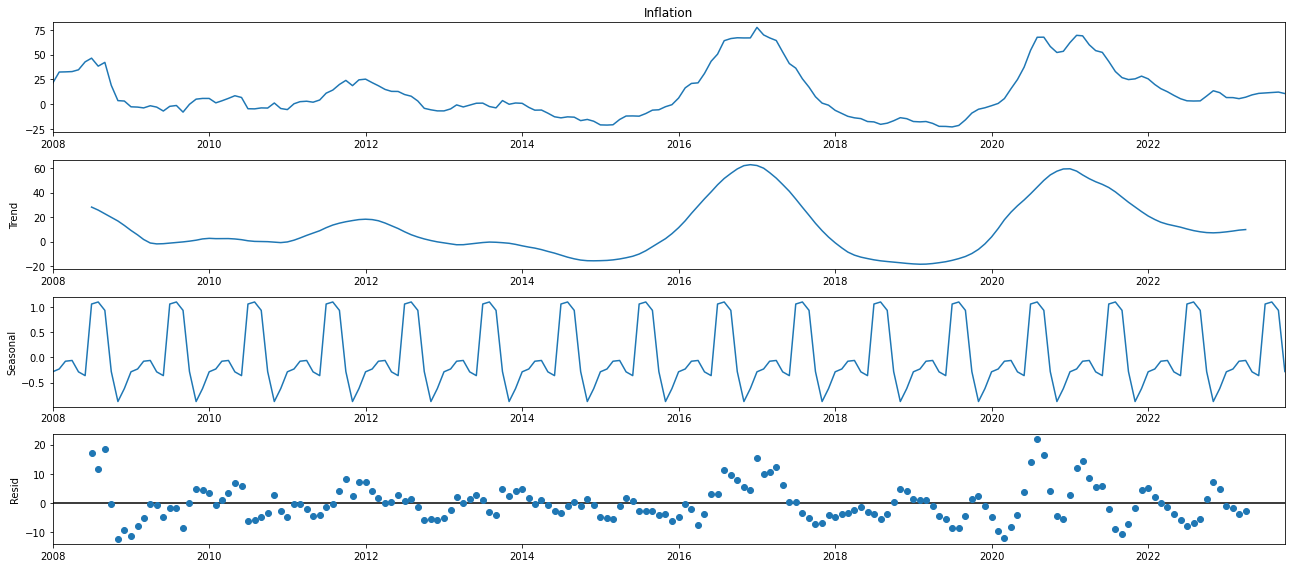

In [42]:
#decomposing inflation to show trend,seasonality and residue

from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ND['Inflation'], model='additive')
fig = decomposition.plot()
plt.show()


In [43]:
#defining ADF test for stationarity

from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    # Perform the Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')
 

In [44]:
#checking ADF test for stationarity for close and inflation

print('Inflation')
print(' ')
check_stationarity(ND['Inflation'])


Inflation
 
ADF Statistic: -3.032539648304694
p-value: 0.031965333762831116
Stationary


In [45]:
# KPSS test
from statsmodels.tsa.stattools import kpss
def kpss_test(NI, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(NI, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(ND['Inflation'])

KPSS Statistic: 0.13151926975925599
p-value: 0.1
num lags: 9
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


# Model building

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


<Figure size 1440x720 with 0 Axes>

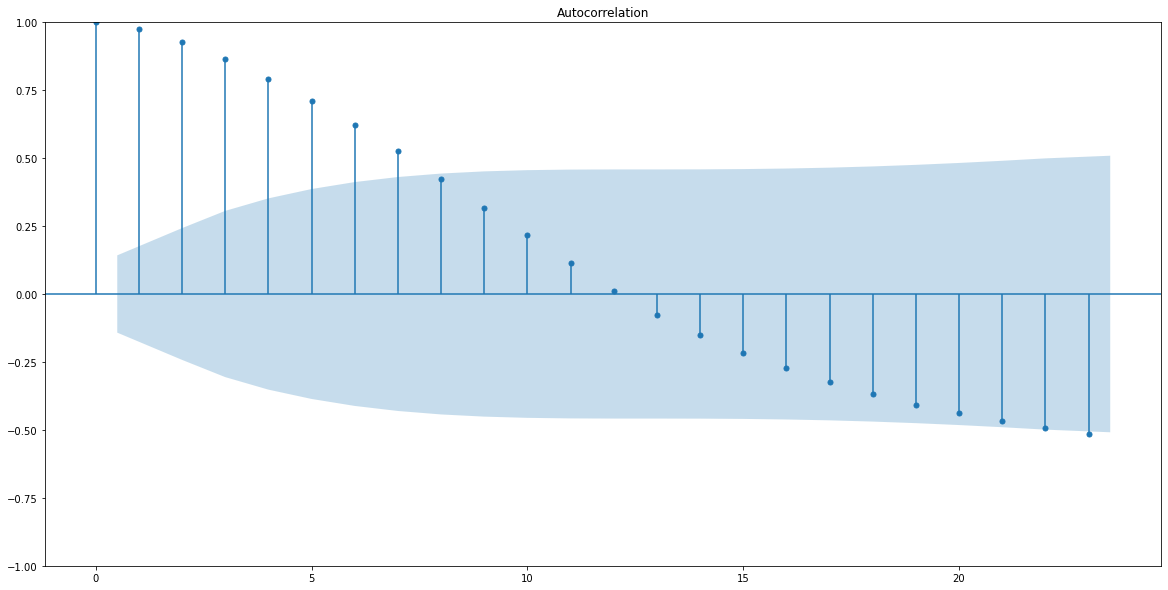

In [47]:
#autocorrelation plot -q

plt.rc("figure", figsize=(20,10))
plt.figure(figsize=(20,10))
plot_acf(ND['Inflation'])
plt.show()

<Figure size 1440x720 with 0 Axes>

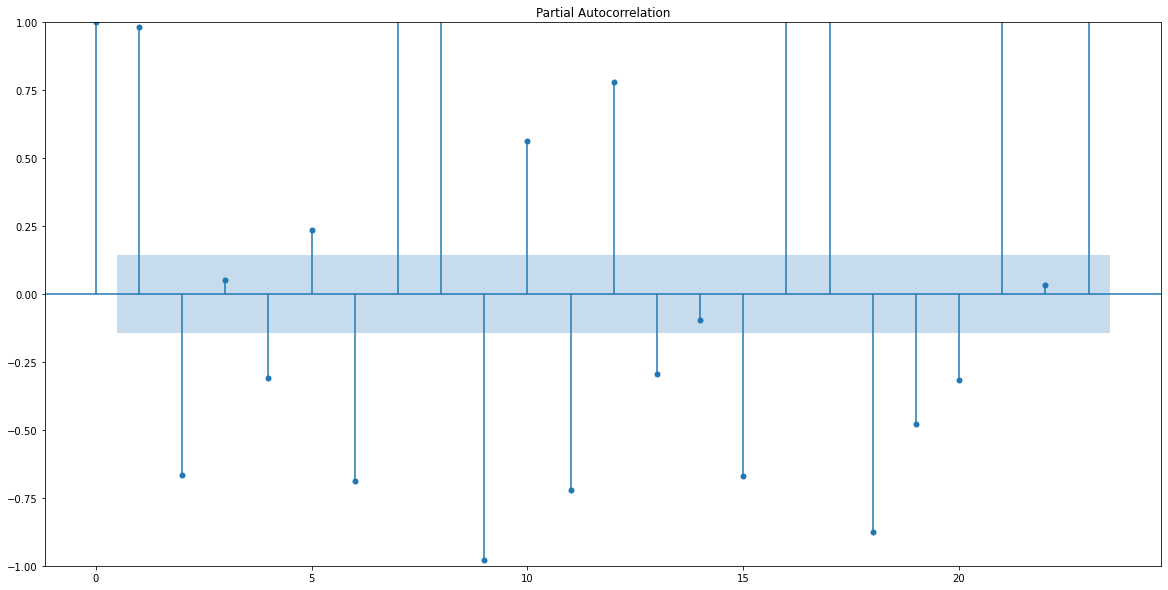

In [48]:
#partial autocorrelation plot - P

plt.rc("figure", figsize=(20,10))
plt.figure(figsize=(20,10))
plot_pacf(ND['Inflation'])
plt.show()

In [49]:
#Dropping close variable hence univariate forecasting

NI = ND['Inflation']

In [50]:
#train and test for forecasting. using the last 12 values as test data while other data points for train data

train_data = NI.iloc[:-12]
test_data = NI.iloc[-12:]


In [51]:
#definig index for train data

train_data.index = pd.DatetimeIndex(train_data.index.values,
                               freq=train_data.index.inferred_freq)

In [52]:
train_data.index


DatetimeIndex(['2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01',
               ...
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01'],
              dtype='datetime64[ns]', length=178, freq='MS')

#  ARIMA 3,0,3 Model

In [53]:
#Building ARIMA Model 

from statsmodels.tsa.arima.model import ARIMA

In [54]:

model = ARIMA(train_data,order=(3,0,3))  # 3,0,3 ( arima p d q )

# Training arima model 
Infmodel_fit = model.fit()

print(Infmodel_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Inflation   No. Observations:                  178
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -515.205
Date:                Wed, 01 May 2024   AIC                           1046.410
Time:                        04:14:38   BIC                           1071.864
Sample:                    01-01-2008   HQIC                          1056.732
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3477      4.514      2.292      0.022       1.500      19.195
ar.L1          1.2659      0.213      5.936      0.000       0.848       1.684
ar.L2          0.3277      0.413      0.793      0.4

In [55]:
# Model evaluation

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

fcast= Infmodel_fit.get_forecast(steps=12)
predicted_inf = fcast.predicted_mean

mse = mean_squared_error(test_data, predicted_inf)
rmse = np.sqrt(mse)

print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)

Mean Squared Error:  21.536848806705397
Root Mean Squared Error:  4.640781055674292


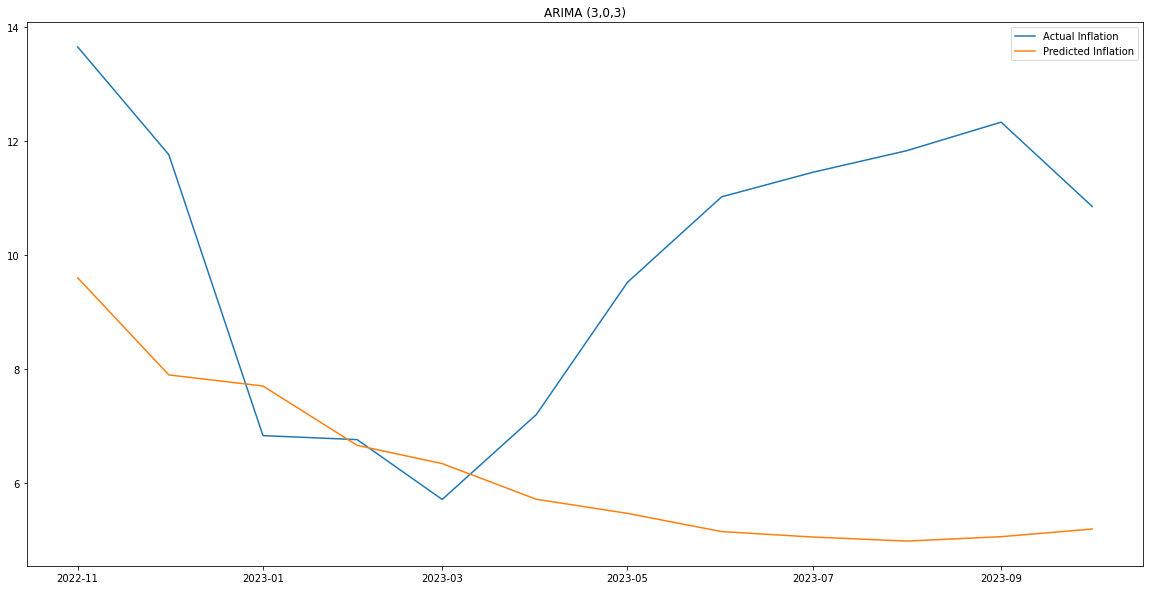

In [56]:
#Plotting actual test data and predicted data
plt.plot(test_data, label='Actual Inflation')
plt.plot(predicted_inf, label='Predicted Inflation')
plt.title('ARIMA (3,0,3)')
plt.legend()
plt.show()

In [57]:
fcast.conf_int()

,lower Inflation,upper Inflation
2022-11-01,1.136343,18.062214
2022-12-01,-6.832552,22.623234
2023-01-01,-11.022703,26.424182
2023-02-01,-15.920565,29.239382
2023-03-01,-19.352330,32.030610
2023-04-01,-22.834247,34.261586
2023-05-01,-25.466755,36.398314
2023-06-01,-27.861379,38.154459
2023-07-01,-29.657317,39.759132
2023-08-01,-31.123331,41.082691


In [58]:
# Print the forecast values : actual v predicted v lower ci v upper ci (95% confidence interval)

result0 = pd.concat([test_data, predicted_inf,fcast.conf_int()], axis=1)
result0 = result0.rename(columns={0: 'Inflation','predicted_mean': 'Pred_Inflation', 'lower Inflation': 'Lower CI',
                                  'upper Inflation': 'Upper CI'})
print(result0)

            Inflation  Pred_Inflation   Lower CI   Upper CI
2022-11-01      13.65        9.599278   1.136343  18.062214
2022-12-01      11.76        7.895341  -6.832552  22.623234
2023-01-01       6.83        7.700740 -11.022703  26.424182
2023-02-01       6.76        6.659408 -15.920565  29.239382
2023-03-01       5.71        6.339140 -19.352330  32.030610
2023-04-01       7.20        5.713670 -22.834247  34.261586
2023-05-01       9.52        5.465780 -25.466755  36.398314
2023-06-01      11.02        5.146540 -27.861379  38.154459
2023-07-01      11.45        5.050907 -29.657317  39.759132
2023-08-01      11.83        4.979680 -31.123331  41.082691
2023-09-01      12.33        5.057097 -32.131452  42.245646
2023-10-01      10.85        5.191350 -32.819296  43.201996


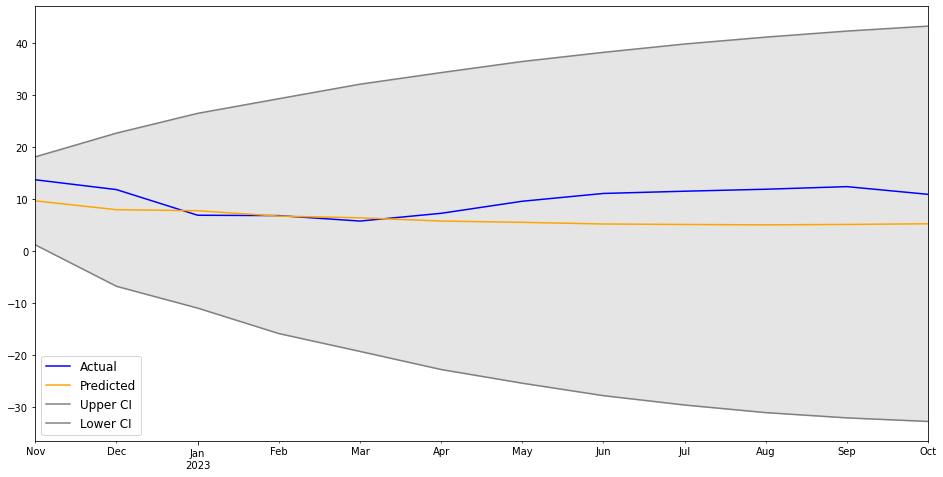

In [59]:
# make a plot of model fit
# Narrow confidence interval better precision

fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(111)


x = result0.index.values


upper = result0['Upper CI']
lower = result0['Lower CI']

result0['Inflation'].plot(color = 'blue', label = 'Actual')
result0['Pred_Inflation'].plot(color = 'orange',label = 'Predicted' )
upper.plot(color = 'grey', label = 'Upper CI')
lower.plot(color = 'grey', label = 'Lower CI')

# plot the legend for the first plot
plt.legend(loc = 'lower left', fontsize = 12)


# fill between the conf intervals
plt.fill_between(x, lower, upper, color='grey', alpha= 0.2)


plt.show()

In [60]:
#viewing modelprediction for plot 
model303 = model.fit().predict()

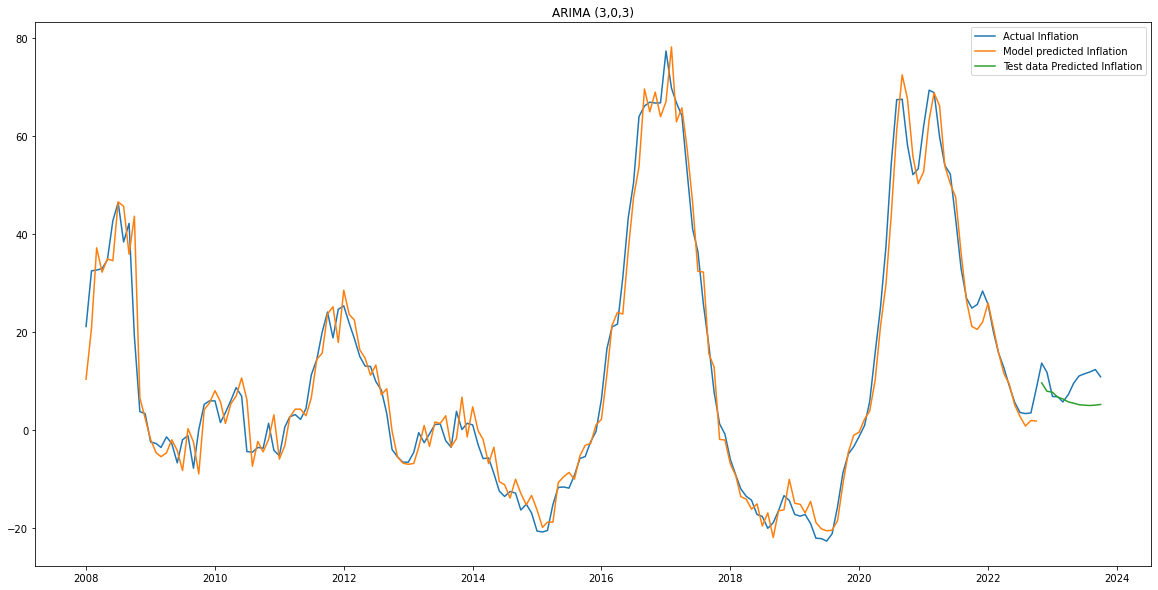

In [61]:
#Plotting actual test data and predicted data
plt.plot(NI, label='Actual Inflation')
plt.plot(model303, label='Model predicted Inflation')
plt.plot(predicted_inf, label='Test data Predicted Inflation')
plt.title('ARIMA (3,0,3)')
plt.legend()
plt.show()

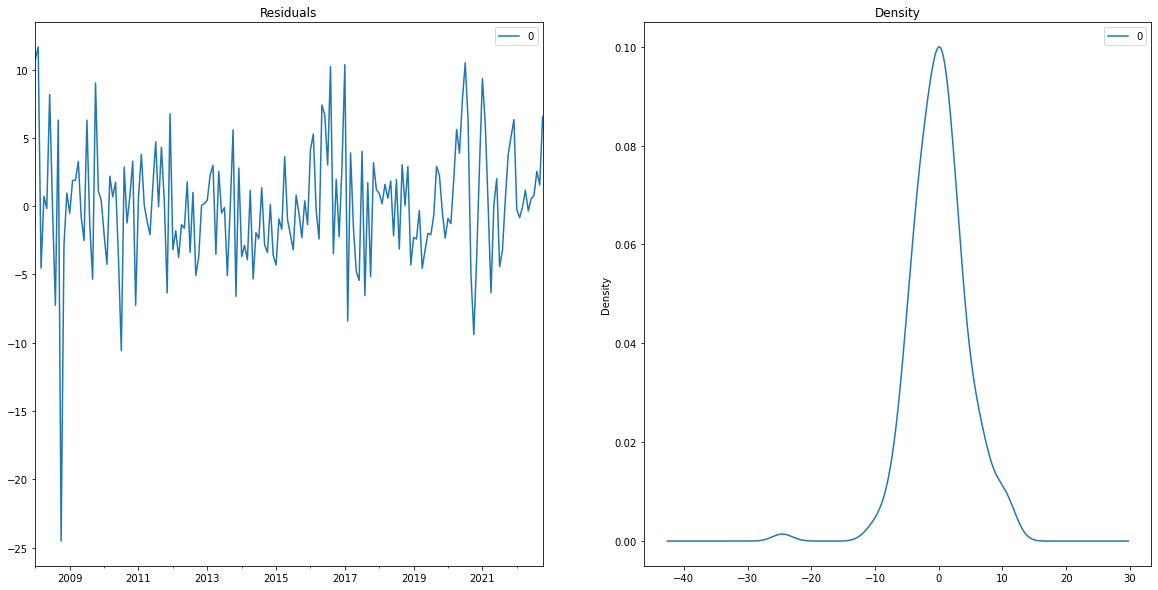

In [62]:
# Plot residual errors
residuals = pd.DataFrame(Infmodel_fit .resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

# ARIMA 2,0,1 Model

In [63]:
model0 = ARIMA(train_data,order=(2,0,1))
# Training arima modeling 
Infmodel_fit0 = model0.fit()
print(Infmodel_fit0.summary())

                               SARIMAX Results                                
Dep. Variable:              Inflation   No. Observations:                  178
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -525.438
Date:                Wed, 01 May 2024   AIC                           1060.877
Time:                        04:15:34   BIC                           1076.786
Sample:                    01-01-2008   HQIC                          1067.328
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7577      6.717      1.602      0.109      -2.407      23.922
ar.L1          1.8537      0.061     30.623      0.000       1.735       1.972
ar.L2         -0.8789      0.059    -14.860      0.0

In [64]:
fcast0= Infmodel_fit0.get_forecast(steps=12)
predicted_inf0 = fcast0.predicted_mean

mse0 = mean_squared_error(test_data, predicted_inf0)
rmse0 = np.sqrt(mse0)

print("Mean Squared Error: ", mse0)
print("Root Mean Squared Error: ", rmse0)

Mean Squared Error:  18.692822022188427
Root Mean Squared Error:  4.323519633607372


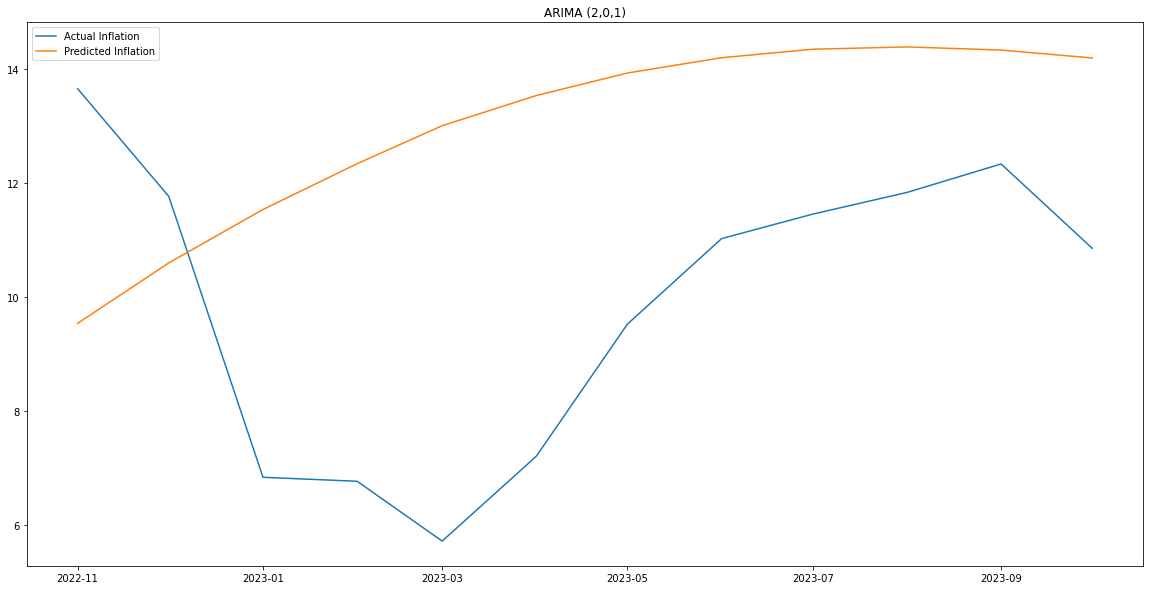

In [65]:
plt.plot(test_data, label='Actual Inflation')
plt.plot(predicted_inf0, label='Predicted Inflation')
plt.title ('ARIMA (2,0,1)')
plt.legend()
plt.show()

In [66]:
fcast0.conf_int()

,lower Inflation,upper Inflation
2022-11-01,0.551471,18.513711
2022-12-01,-3.773209,24.961142
2023-01-01,-7.774027,30.835810
2023-02-01,-11.539552,36.209285
2023-03-01,-15.038406,41.041937
2023-04-01,-18.228879,45.291706
2023-05-01,-21.080193,48.934409
2023-06-01,-23.577026,51.967266
2023-07-01,-25.719426,54.407768
2023-08-01,-27.521134,56.290979


In [67]:
# Print the forecast values : actual v predicted v lower ci v upper ci (95% confidence interval)

result = pd.concat([test_data, predicted_inf0,fcast0.conf_int()], axis=1)
result = result.rename(columns={0: 'Inflation','predicted_mean': 'Pred_Inflation', 'lower Inflation': 'Lower CI',
                                  'upper Inflation': 'Upper CI'})
print(result)

            Inflation  Pred_Inflation   Lower CI   Upper CI
2022-11-01      13.65        9.532591   0.551471  18.513711
2022-12-01      11.76       10.593966  -3.773209  24.961142
2023-01-01       6.83       11.530892  -7.774027  30.835810
2023-02-01       6.76       12.334866 -11.539552  36.209285
2023-03-01       5.71       13.001766 -15.038406  41.041937
2023-04-01       7.20       13.531413 -18.228879  45.291706
2023-05-01       9.52       13.927108 -21.080193  48.934409
2023-06-01      11.02       14.195120 -23.577026  51.967266
2023-07-01      11.45       14.344171 -25.719426  54.407768
2023-08-01      11.83       14.384922 -27.521134  56.290979
2023-09-01      12.33       14.329467 -29.007275  57.666208
2023-10-01      10.85       14.190853 -30.211755  58.593462


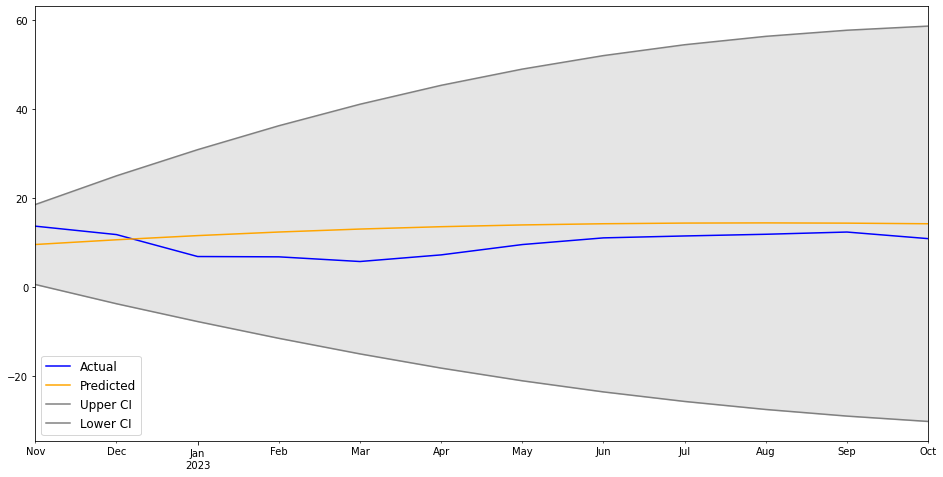

In [68]:
# make a plot of model fit
# Narrow confidence interval better precision

fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(111)


x = result.index.values


upper = result['Upper CI']
lower = result['Lower CI']

result['Inflation'].plot(color = 'blue', label = 'Actual')
result['Pred_Inflation'].plot(color = 'orange',label = 'Predicted' )
upper.plot(color = 'grey', label = 'Upper CI')
lower.plot(color = 'grey', label = 'Lower CI')

# plot the legend for the first plot
plt.legend(loc = 'lower left', fontsize = 12)


# fill between the conf intervals
plt.fill_between(x, lower, upper, color='grey', alpha= 0.2)


plt.show()

In [69]:
#viewing modelprediction for plot 
model201 = model0.fit().predict()

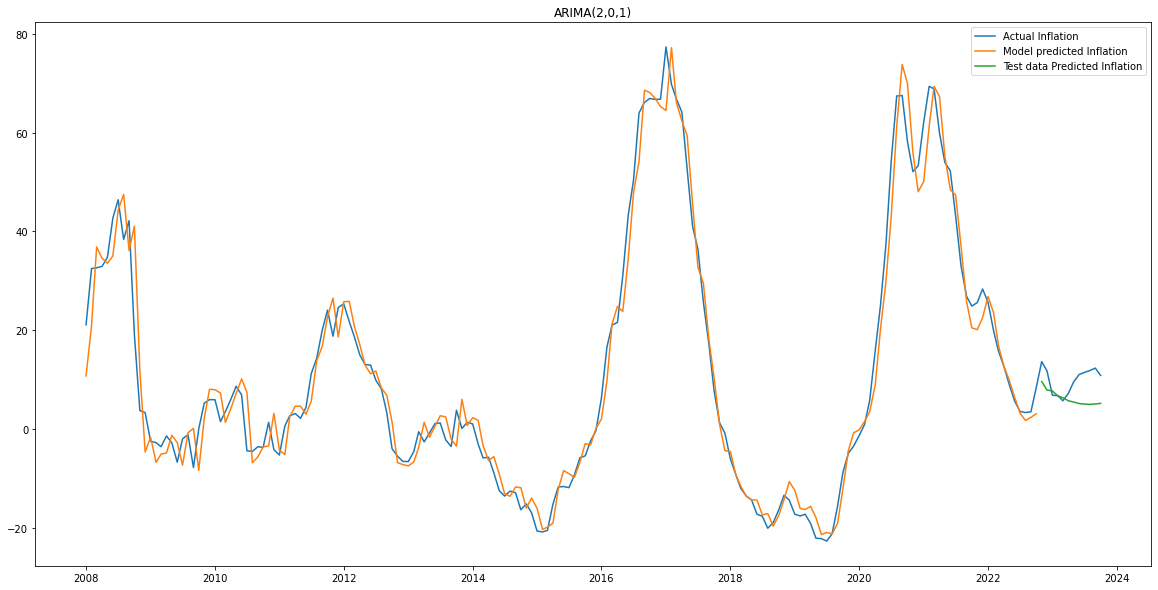

In [70]:
#Plotting actual test data and predicted data
plt.plot(NI, label='Actual Inflation')
plt.plot(model201, label='Model predicted Inflation')
plt.plot(predicted_inf, label='Test data Predicted Inflation')
plt.title('ARIMA(2,0,1)')
plt.legend()
plt.show()

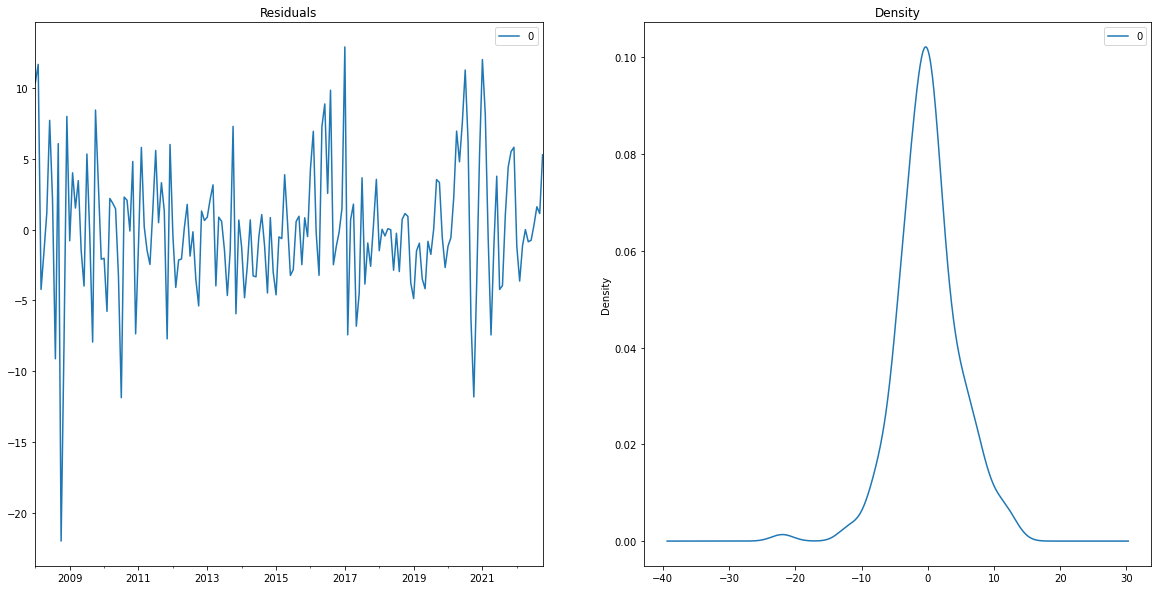

In [71]:
# Plot residual errors
residuals = pd.DataFrame(Infmodel_fit0 .resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

# ARIMA(3,0,2)

In [72]:
model302 = ARIMA(train_data,order=(3,0,2))
# Training arima modeling 
Infmodel_fit302 = model302.fit()
print(Infmodel_fit302.summary())

                               SARIMAX Results                                
Dep. Variable:              Inflation   No. Observations:                  178
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -515.434
Date:                Wed, 01 May 2024   AIC                           1044.868
Time:                        04:15:54   BIC                           1067.140
Sample:                    01-01-2008   HQIC                          1053.900
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5010      5.116      2.053      0.040       0.473      20.529
ar.L1          1.3226      0.121     10.928      0.000       1.085       1.560
ar.L2          0.1994      0.205      0.971      0.3

In [73]:
fcast302= Infmodel_fit302.get_forecast(steps=12)
predicted_inf302 = fcast302.predicted_mean

mse302 = mean_squared_error(test_data, predicted_inf302)
rmse302 = np.sqrt(mse302)

print("Mean Squared Error: ", mse302)
print("Root Mean Squared Error: ", rmse302)

Mean Squared Error:  6.663006329055892
Root Mean Squared Error:  2.5812799788197895


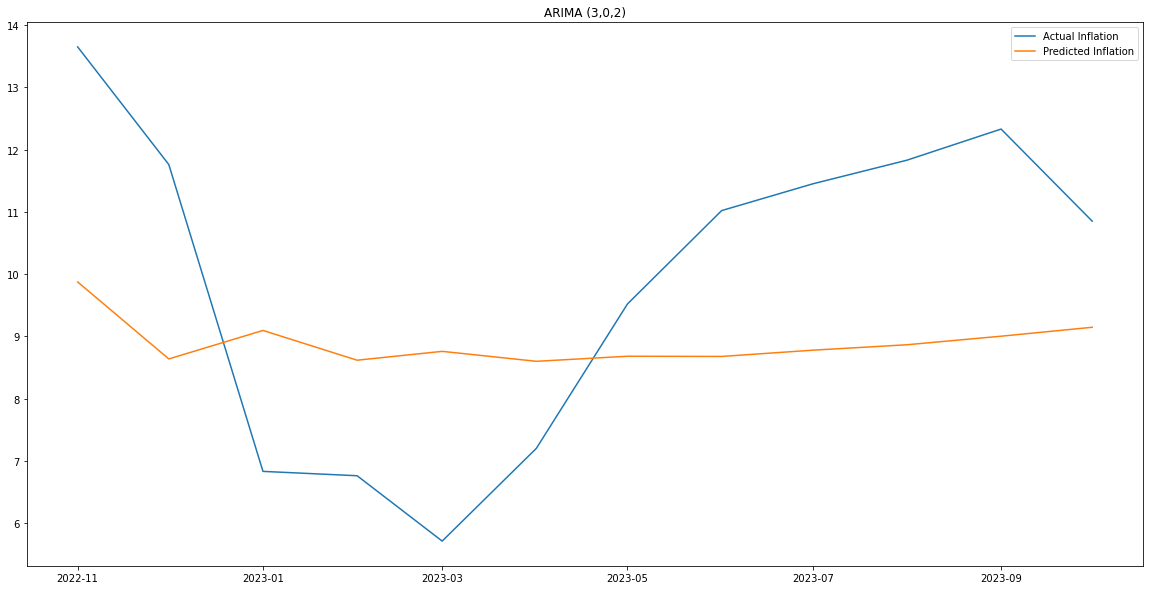

In [74]:
plt.plot(test_data, label='Actual Inflation')
plt.plot(predicted_inf302, label='Predicted Inflation')
plt.title ('ARIMA (3,0,2)')
plt.legend()
plt.show()

In [75]:
fcast302.conf_int()

,lower Inflation,upper Inflation
2022-11-01,1.399072,18.347542
2022-12-01,-6.038946,23.312673
2023-01-01,-9.535271,27.724065
2023-02-01,-14.032250,31.264502
2023-03-01,-17.205575,34.722710
2023-04-01,-20.444135,37.641294
2023-05-01,-22.986068,40.345815
2023-06-01,-25.281053,42.634496
2023-07-01,-27.087565,44.642037
2023-08-01,-28.570273,46.299450


In [76]:
# Print the forecast values : actual v predicted v lower ci v upper ci (95% confidence interval)

result302 = pd.concat([test_data, predicted_inf302,fcast302.conf_int()], axis=1)

result302 = result302.rename(columns={0: 'Inflation','predicted_mean': 'Pred_Inflation', 'lower Inflation': 'Lower CI',
                                  'upper Inflation': 'Upper CI'})
print(result302)

            Inflation  Pred_Inflation   Lower CI   Upper CI
2022-11-01      13.65        9.873307   1.399072  18.347542
2022-12-01      11.76        8.636863  -6.038946  23.312673
2023-01-01       6.83        9.094397  -9.535271  27.724065
2023-02-01       6.76        8.616126 -14.032250  31.264502
2023-03-01       5.71        8.758568 -17.205575  34.722710
2023-04-01       7.20        8.598580 -20.444135  37.641294
2023-05-01       9.52        8.679874 -22.986068  40.345815
2023-06-01      11.02        8.676722 -25.281053  42.634496
2023-07-01      11.45        8.777236 -27.087565  44.642037
2023-08-01      11.83        8.864589 -28.570273  46.299450
2023-09-01      12.33        9.001903 -29.670988  47.674793
2023-10-01      10.85        9.145340 -30.471275  48.761956


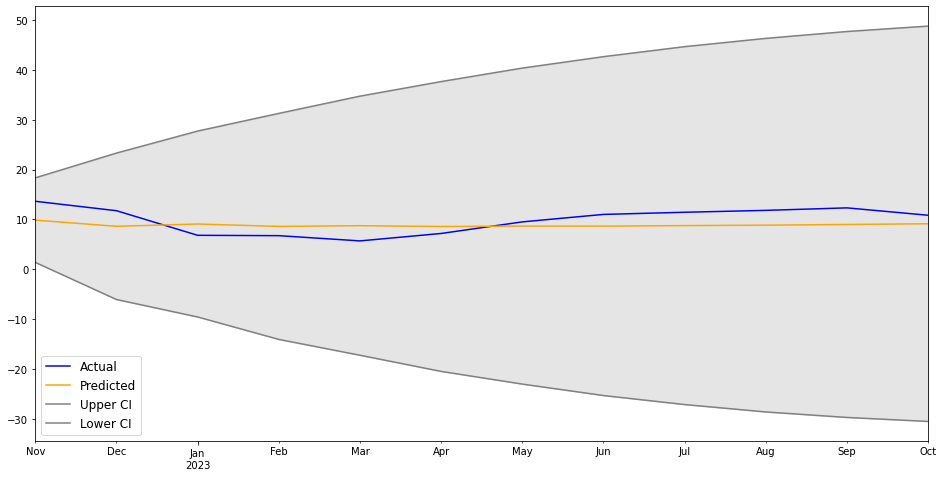

In [77]:
# make a plot of model fit
# Narrow confidence interval better precision

fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(111)


x = result.index.values


upper = result302['Upper CI']
lower = result302['Lower CI']

result302['Inflation'].plot(color = 'blue', label = 'Actual')
result302['Pred_Inflation'].plot(color = 'orange',label = 'Predicted' )
upper.plot(color = 'grey', label = 'Upper CI')
lower.plot(color = 'grey', label = 'Lower CI')

# plot the legend for the first plot
plt.legend(loc = 'lower left', fontsize = 12)


# fill between the conf intervals
plt.fill_between(x, lower, upper, color='grey', alpha= 0.2)


plt.show()

In [78]:
#viewing modelprediction for plot 
model302 = model302.fit().predict()

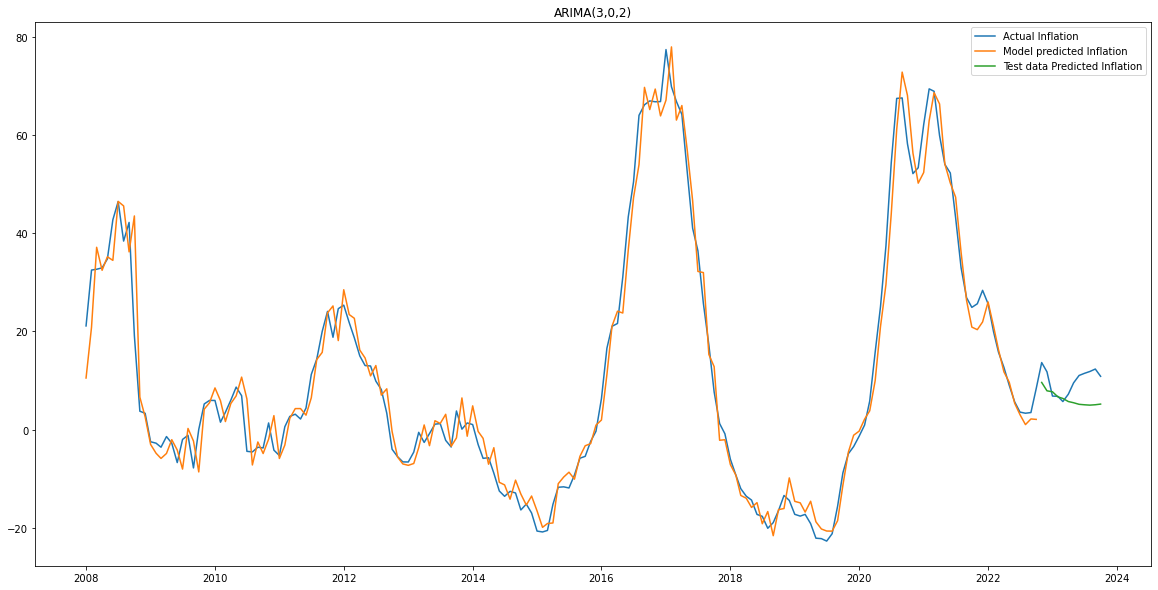

In [79]:
#Plotting actual test data and predicted data
plt.plot(NI, label='Actual Inflation')
plt.plot(model302, label='Model predicted Inflation')
plt.plot(predicted_inf, label='Test data Predicted Inflation')
plt.title('ARIMA(3,0,2)')
plt.legend()
plt.show()


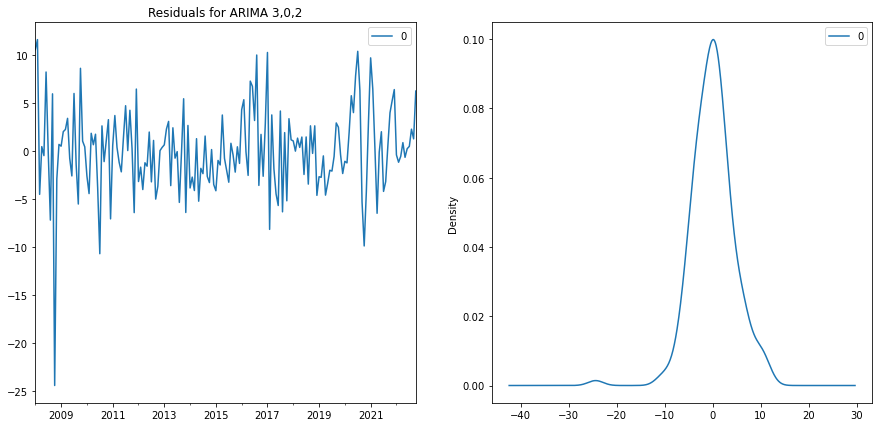

In [80]:
# Plot residual errors
residuals101 = pd.DataFrame(Infmodel_fit302.resid)
fig, ax = plt.subplots(1,2)
residuals101.plot(title="Residuals for ARIMA 3,0,2", ax=ax[0],figsize=(15,7))
residuals101.plot(kind='kde',ax=ax[1])
plt.show()

# Plotting All Manual ARIMA Models

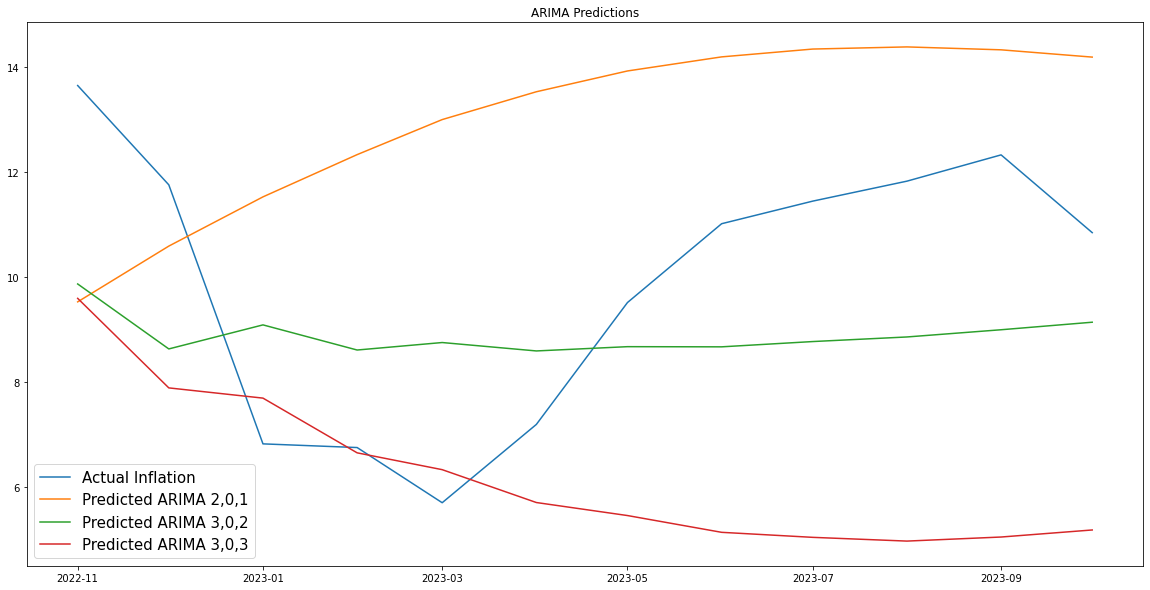

In [81]:
#Plotting all ARIMA predictions against test data 

plt.plot(test_data, label='Actual Inflation')
plt.plot(predicted_inf0, label='Predicted ARIMA 2,0,1')
plt.plot(predicted_inf302, label='Predicted ARIMA 3,0,2')
plt.plot(predicted_inf, label='Predicted ARIMA 3,0,3')
plt.title ('ARIMA Predictions')
plt.legend(loc='lower left',fontsize="15")
plt.show()

# AUTO ARIMA model 

In [82]:
from pmdarima.arima import auto_arima

In [83]:
#import pmdarima as pm

model1 = auto_arima(train_data, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=False,          
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,False,1)(0,0,0)[0]             : AIC=1072.126, Time=0.03 sec
 ARIMA(0,False,0)(0,0,0)[0]             : AIC=1688.582, Time=0.01 sec
 ARIMA(1,False,0)(0,0,0)[0]             : AIC=1115.573, Time=0.01 sec
 ARIMA(0,False,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,False,1)(0,0,0)[0]             : AIC=1061.791, Time=0.02 sec
 ARIMA(2,False,0)(0,0,0)[0]             : AIC=1063.733, Time=0.01 sec
 ARIMA(3,False,1)(0,0,0)[0]             : AIC=1058.339, Time=0.04 sec
 ARIMA(3,False,0)(0,0,0)[0]             : AIC=1064.338, Time=0.02 sec
 ARIMA(4,False,1)(0,0,0)[0]             : AIC=1050.636, Time=0.03 sec
 ARIMA(4,False,0)(0,0,0)[0]             : AIC=1060.373, Time=0.02 sec
 ARIMA(5,False,1)(0,0,0)[0]             : AIC=1052.624, Time=0.07 sec
 ARIMA(4,False,2)(0,0,0)[0]             : AIC=1049.271, Time=0.10 sec
 ARIMA(3,False,2)(0,0,0)[0]             : AIC=1047.401, Time=0.05 sec
 ARIMA(2,False,2)(0,0,0)[0]             : AIC=1056.8

In [84]:
# Forecast

Test_size =12

prediction,conf_int3 = model1.predict(n_periods=len(test_data),return_conf_int=True,alpha=0.05)


In [85]:
mse1= mean_squared_error(test_data, prediction)
rmse1 = np.sqrt(mse1)

print("Mean Squared Error: ", mse1)
print("Root Mean Squared Error: ", rmse1)

Mean Squared Error:  6.657822001602984
Root Mean Squared Error:  2.5802755669894997


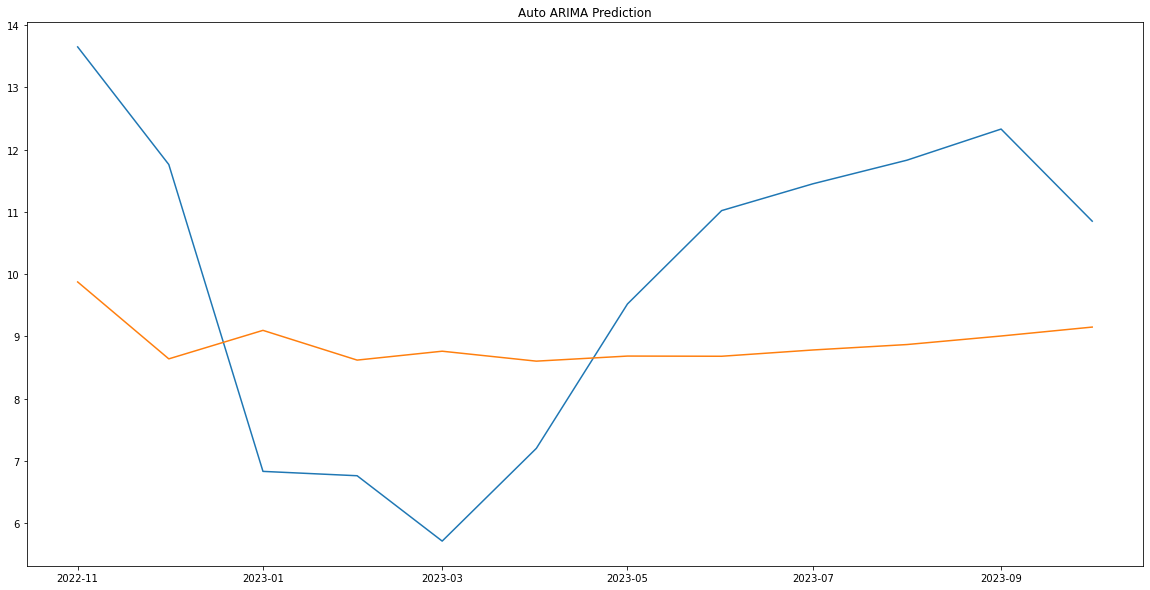

In [86]:
#plot the predictions for validation set
#plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(prediction, label='Prediction')
plt.title ('Auto ARIMA Prediction')
plt.show()

In [87]:
prediction =pd.DataFrame(prediction,index =test_data.index,columns=["Prediction"])
                          
conf_int3 =pd.DataFrame(conf_int3,index = test_data.index,columns=['LowerCI','UpperCI'])

In [88]:
# Print the forecast values : actual v predicted v lower ci v upper ci (95% confidence interval)

result3 = pd.concat([test_data, prediction,conf_int3], axis=1)

print(result3)

            Inflation  Prediction    LowerCI    UpperCI
date                                                   
2022-11-01      13.65    9.873719   1.399526  18.347912
2022-12-01      11.76    8.637850  -6.038031  23.313730
2023-01-01       6.83    9.095835  -9.534129  27.725800
2023-02-01       6.76    8.617996 -14.030920  31.266912
2023-03-01       5.71    8.760812 -17.204091  34.725715
2023-04-01       7.20    8.601138 -20.442527  37.644802
2023-05-01       9.52    8.682693 -22.984335  40.349720
2023-06-01      11.02    8.679734 -25.279211  42.638679
2023-07-01      11.45    8.780386 -27.085613  44.646385
2023-08-01      11.83    8.867813 -28.568224  46.303849
2023-09-01      12.33    9.005144 -29.668854  47.679142
2023-10-01      10.85    9.148542 -30.469082  48.766166


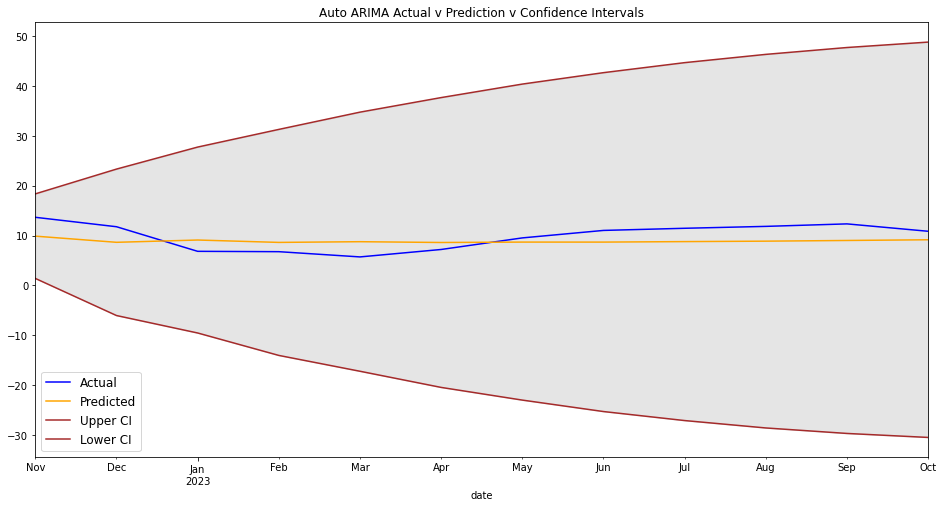

In [89]:
# make a plot of model fit
# Narrow confidence interval better precision

fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(111)


x = result3.index.values


upper = result3['UpperCI']
lower = result3['LowerCI']

result3['Inflation'].plot(color = 'blue', label = 'Actual')
result3['Prediction'].plot(color = 'orange',label = 'Predicted' )
upper.plot(color = 'Brown', label = 'Upper CI')
lower.plot(color = 'Brown', label = 'Lower CI')

# plot the legend for the first plot
plt.legend(loc = 'lower left', fontsize = 12)


# fill between the conf intervals
plt.fill_between(x, lower, upper, color='grey', alpha= 0.2)
plt.title('Auto ARIMA Actual v Prediction v Confidence Intervals')

plt.show()

In [90]:
#viewing modelprediction for plot 
modelAuto = model1.fittedvalues()

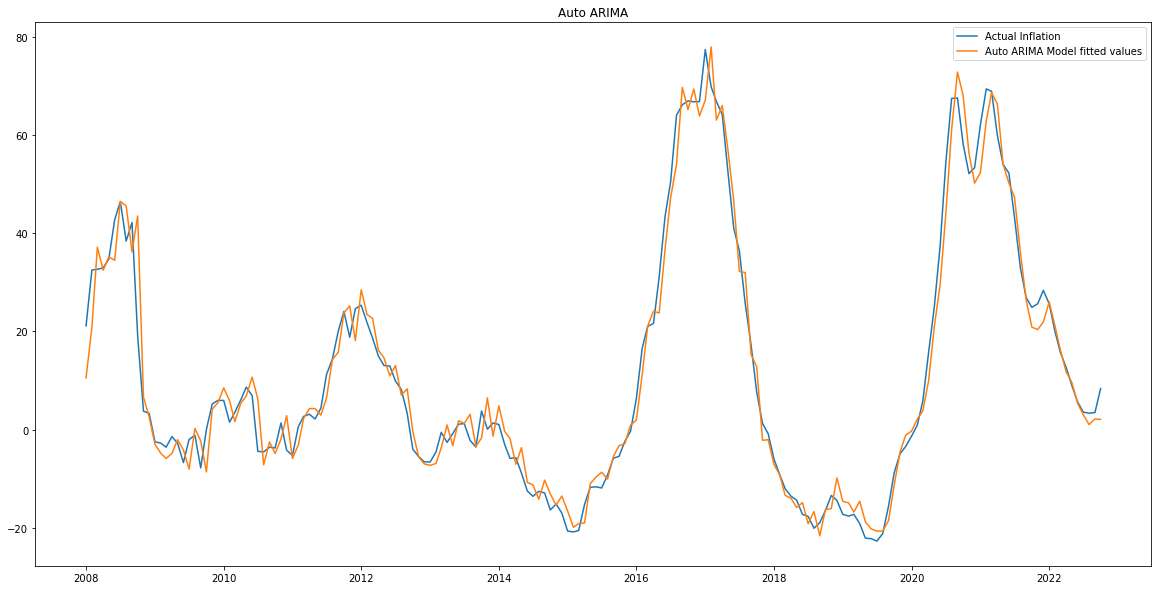

In [91]:
#Plotting actual test data and predicted data
plt.plot(train_data, label='Actual Inflation')
plt.plot(modelAuto, label='Auto ARIMA Model fitted values')
#plt.plot(prediction, label='Test data Predicted Inflation')
plt.title('Auto ARIMA')
plt.legend()
plt.show()

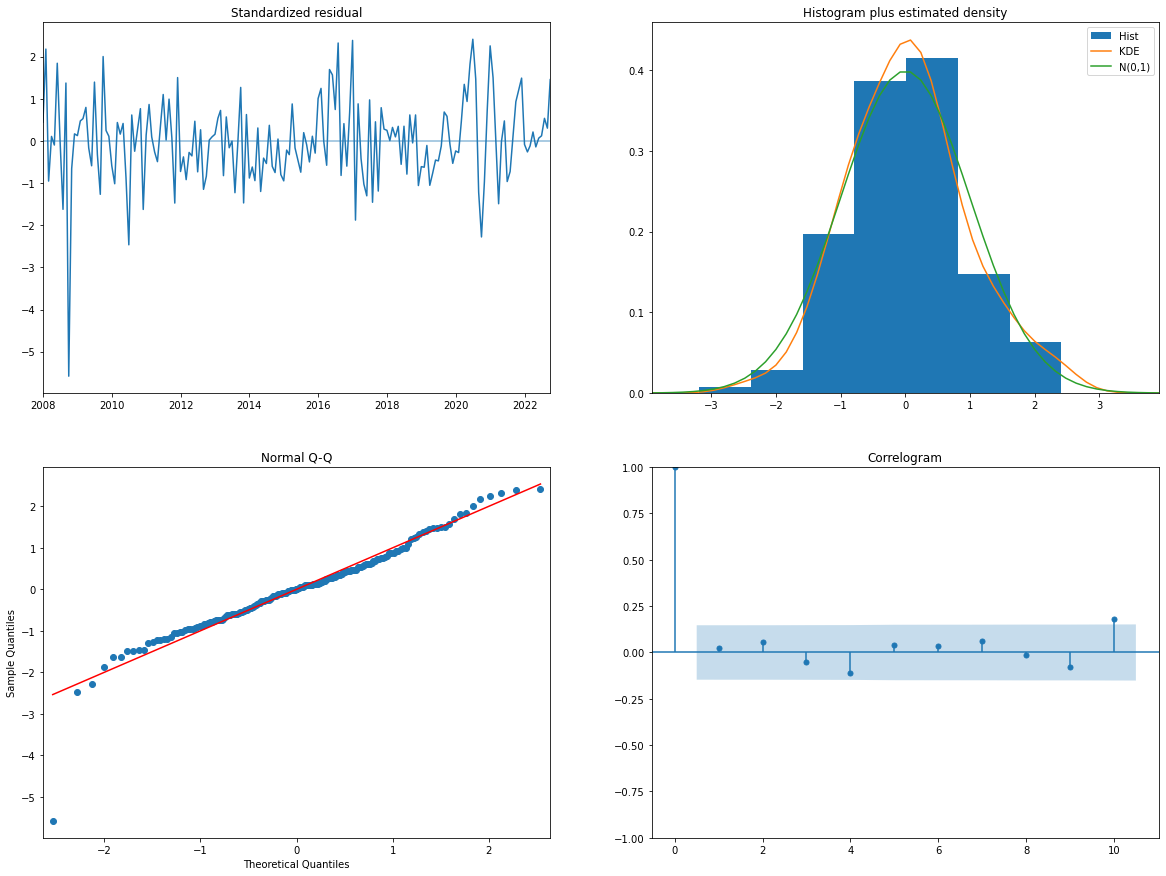

In [92]:
#residue auto arima
model1.plot_diagnostics(figsize=(20,15))
plt.show()

# Exponential Smoothing

In [93]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [94]:
#First Instance
#best pratice alpha between 0.1 - 1.0

ins1 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(12).rename('alpha=0.2')

#Second Instance
ins2 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.8,optimized=False)
ins_cast2 = ins2.forecast(12).rename('alpha=0.8')

#Third Instance
ins3 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.99,optimized=False)
ins_cast3 = ins3.forecast(12).rename('alpha=0.99')



In [95]:
resultSES = pd.concat([ins_cast1,ins_cast2,ins_cast3], axis=1)

print(resultSES)

            alpha=0.2  alpha=0.8  alpha=0.99
2022-11-01  10.593457   7.382923    8.311086
2022-12-01  10.593457   7.382923    8.311086
2023-01-01  10.593457   7.382923    8.311086
2023-02-01  10.593457   7.382923    8.311086
2023-03-01  10.593457   7.382923    8.311086
2023-04-01  10.593457   7.382923    8.311086
2023-05-01  10.593457   7.382923    8.311086
2023-06-01  10.593457   7.382923    8.311086
2023-07-01  10.593457   7.382923    8.311086
2023-08-01  10.593457   7.382923    8.311086
2023-09-01  10.593457   7.382923    8.311086
2023-10-01  10.593457   7.382923    8.311086


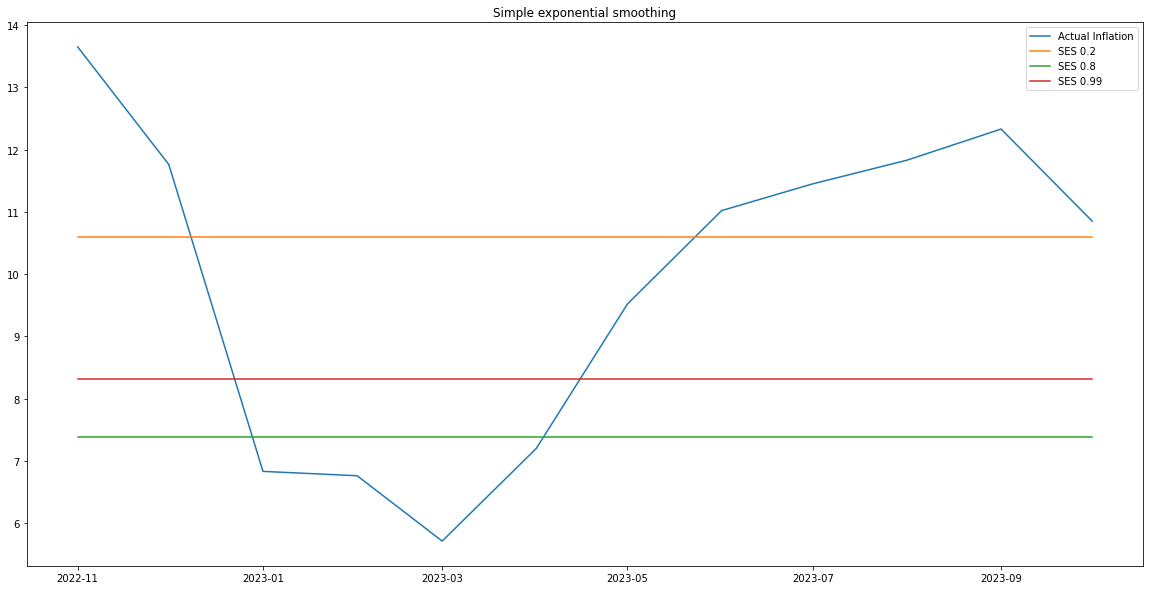

In [96]:
#Plotting all SES predictions against test data 

plt.plot(test_data, label='Actual Inflation')
plt.plot(ins_cast1, label='SES 0.2')
plt.plot(ins_cast2, label='SES 0.8')
plt.plot(ins_cast3, label='SES 0.99')
plt.title ('Simple exponential smoothing')
plt.legend()
plt.show()

In [97]:
#SES model evaluation

print('SES Instance 1')
sesmse1 = ((ins_cast1 - test_data) ** 2).mean()
print('Mean Squared Error',sesmse1)
print('The Root Mean Squared Error for instance 1 {}'.format(round(np.sqrt(sesmse1), 2)))
print('')

print('SES Instance 2')
sesmse2 = ((ins_cast2 - test_data) ** 2).mean()
print('Mean Squared Error',sesmse2)
print('The Root Mean Squared Error for instance 2 {}'.format(round(np.sqrt(sesmse2), 2)))
print('')
print('SES Instance 3')
sesmse3 = ((ins_cast3 - test_data) ** 2).mean()
print('Mean Squared Error',sesmse3)
print('The Root Mean Squared Error for instance 3 {}'.format(round(np.sqrt(sesmse3), 2)))


SES Instance 1
Mean Squared Error 6.800361410055941
The Root Mean Squared Error for instance 1 2.61

SES Instance 2
Mean Squared Error 12.714012782597047
The Root Mean Squared Error for instance 2 3.57

SES Instance 3
Mean Squared Error 8.885968653689853
The Root Mean Squared Error for instance 3 2.98


# Simple moving Average

In [98]:
#creating MA using ARMA model by defining q only q=2

ARMA_model = ARIMA(train_data, order=(0, 0,2))
results = ARMA_model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:              Inflation   No. Observations:                  178
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -647.616
Date:                Wed, 01 May 2024   AIC                           1303.233
Time:                        04:17:24   BIC                           1315.960
Sample:                    01-01-2008   HQIC                          1308.394
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2090      2.668      4.201      0.000       5.980      16.438
ma.L1          1.5409      0.054     28.603      0.000       1.435       1.646
ma.L2          0.7625      0.056     13.636      0.0

In [99]:
#viewing modelprediction for plot 
ARMA_modelpred = ARMA_model.fit().predict()

In [100]:
## q = 3

In [101]:
#creating MA using ARMA model by defining q only q=3

ARMA_model1 = ARIMA(train_data, order=(0, 0,3))
result1 = ARMA_model1.fit()
print(result1.summary())

                               SARIMAX Results                                
Dep. Variable:              Inflation   No. Observations:                  178
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -594.402
Date:                Wed, 01 May 2024   AIC                           1198.804
Time:                        04:17:34   BIC                           1214.713
Sample:                    01-01-2008   HQIC                          1205.256
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4150      2.901      3.934      0.000       5.728      17.102
ma.L1          1.8010      0.055     32.908      0.000       1.694       1.908
ma.L2          1.6488      0.085     19.419      0.0

In [102]:
#viewing modelprediction for plot 
ARMA_modelpred1 = ARMA_model1.fit().predict()

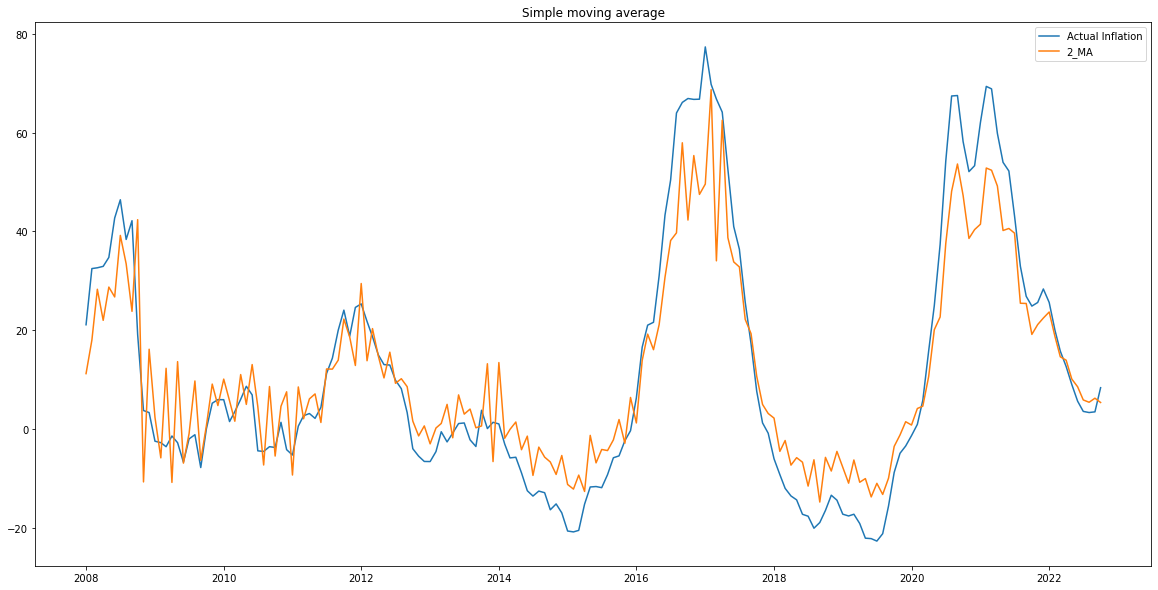

In [103]:
#Plotting actual train data, model 
plt.plot(train_data, label='Actual Inflation')
plt.plot(ARMA_modelpred , label='2_MA')
plt.title('Simple moving average')
plt.legend()
plt.show()


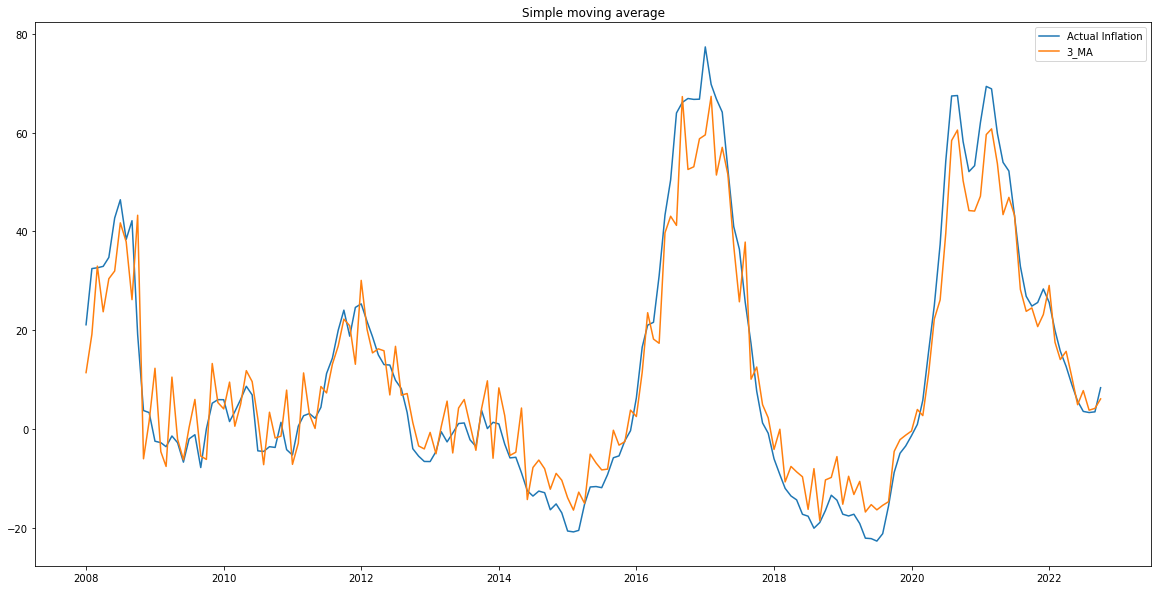

In [104]:
#Plotting actual train data, model 
plt.plot(train_data, label='Actual Inflation')
plt.plot(ARMA_modelpred1 , label='3_MA')
plt.title('Simple moving average')
plt.legend()
plt.show()


In [105]:
## Evaluation of ARMA(0,0,2)

In [106]:
ARMAfcast= results.get_forecast(steps=12)
predicted002 = ARMAfcast.predicted_mean

In [107]:
predicted002=predicted002.rename('2MA')

In [108]:
mse002 = mean_squared_error(test_data, predicted002)
rmse002 = np.sqrt(mse002)

print("Mean Squared Error: ", mse002)
print("Root Mean Squared Error: ", rmse002)

Mean Squared Error:  7.750802143259662
Root Mean Squared Error:  2.7840262468697494


In [109]:
## Evaluation of ARMA(0,0,3)

In [110]:
ARMAfcast3= result1.get_forecast(steps=12)
predicted003 = ARMAfcast3.predicted_mean

In [111]:
predicted003= predicted003.rename('3MA')

In [112]:
mse003 = mean_squared_error(test_data, predicted003)
rmse003 = np.sqrt(mse003)

print("Mean Squared Error: ", mse003)
print("Root Mean Squared Error: ", rmse003)

Mean Squared Error:  10.476113383149054
Root Mean Squared Error:  3.236682465604103


In [113]:
#q=12

In [114]:
#creating MA using ARMA model by defining q only q=12

ARMA_model12 = ARIMA(train_data, order=(0, 0,12))
result12 = ARMA_model12.fit()
print(result12.summary())

                               SARIMAX Results                                
Dep. Variable:              Inflation   No. Observations:                  178
Model:                ARIMA(0, 0, 12)   Log Likelihood                -495.586
Date:                Wed, 01 May 2024   AIC                           1019.173
Time:                        04:17:50   BIC                           1063.718
Sample:                    01-01-2008   HQIC                          1037.237
                         - 10-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2970      5.825      1.940      0.052      -0.119      22.713
ma.L1          1.4265      1.561      0.914      0.361      -1.634       4.487
ma.L2          1.4253      3.049      0.468      0.6

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [115]:
#viewing modelprediction for plot 
ARMA_modelpred12 = ARMA_model12.fit().predict()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


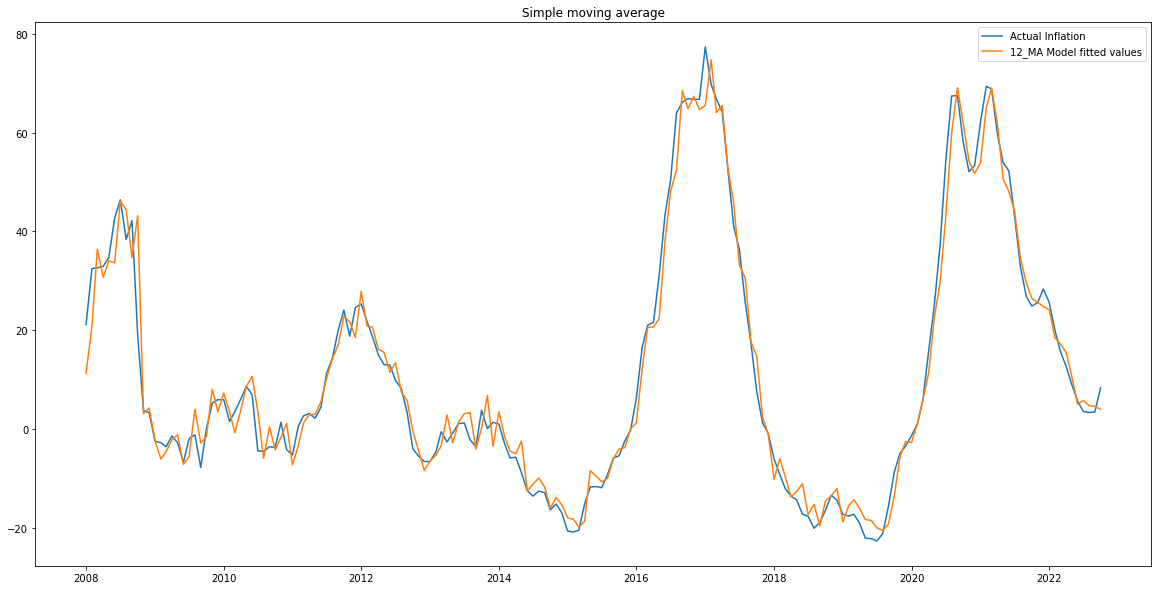

In [116]:
#Plotting actual train data, model 
plt.plot(train_data, label='Actual Inflation')
plt.plot(ARMA_modelpred12 , label='12_MA Model fitted values')
plt.title('Simple moving average')
plt.legend()
plt.show()


In [117]:
#Prediction and Evaluation q=12

In [118]:
ARMAfcast12= result12.get_forecast(steps=12)
predicted12 = ARMAfcast12.predicted_mean


In [119]:
predicted12=predicted12.rename('12MA')

In [120]:
predicted12

2022-11-01    10.071227
2022-12-01     7.694820
2023-01-01     6.147343
2023-02-01     4.498324
2023-03-01     5.271082
2023-04-01     8.600758
2023-05-01    12.020680
2023-06-01    12.905037
2023-07-01    13.109064
2023-08-01    14.746046
2023-09-01    15.773707
2023-10-01    13.469375
Freq: MS, Name: 12MA, dtype: float64

In [121]:
mse12 = mean_squared_error(test_data, predicted12)
rmse12 = np.sqrt(mse12)

print("Mean Squared Error: ", mse12)
print("Root Mean Squared Error: ", rmse12)

Mean Squared Error:  6.404341805136163
Root Mean Squared Error:  2.5306801072312877


In [122]:
## best SMA model q=12

In [123]:
#concating test data, predicted inflation and confidence intervals

result012 = pd.concat([test_data, predicted12,ARMAfcast12.conf_int()]
                      , axis=1)

In [124]:
#Renaming columns
result012 = result012.rename(columns={0: 'Inflation','12MA': 
                'Pred_Inflation', 'lower Inflation': 'Lower CI',
                                  'upper Inflation': 'Upper CI'})
print(result012)


            Inflation  Pred_Inflation   Lower CI   Upper CI
2022-11-01      13.65       10.071227   2.629446  17.513009
2022-12-01      11.76        7.694820  -5.321434  20.711073
2023-01-01       6.83        6.147343 -10.702067  22.996754
2023-02-01       6.76        4.498324 -15.790763  24.787412
2023-03-01       5.71        5.271082 -17.601217  28.143381
2023-04-01       7.20        8.600758 -16.871848  34.073363
2023-05-01       9.52       12.020680 -15.909604  39.950963
2023-06-01      11.02       12.905037 -17.548355  43.358428
2023-07-01      11.45       13.109064 -19.596485  45.814613
2023-08-01      11.83       14.746046 -19.450300  48.942393
2023-09-01      12.33       15.773707 -19.643211  51.190626
2023-10-01      10.85       13.469375 -22.960316  49.899067


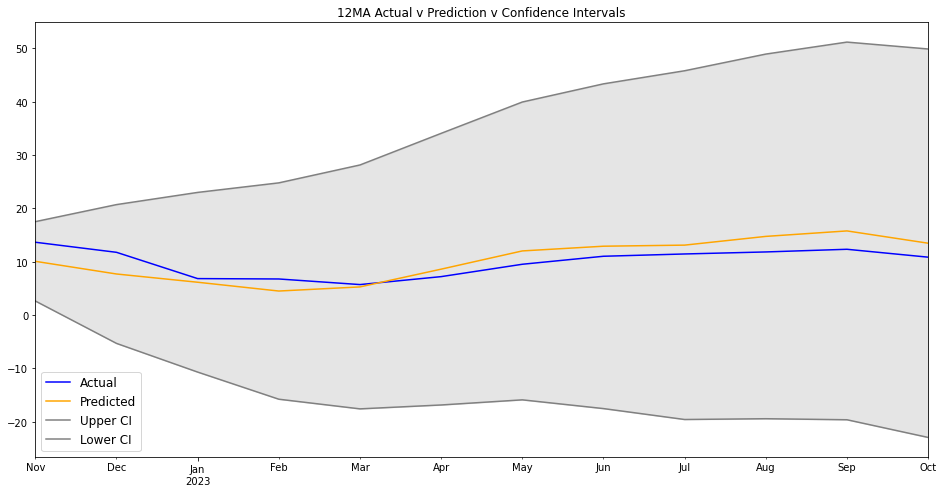

In [125]:
# make a plot of model fit
# Narrow confidence interval better precision

fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(111)


x = result012.index.values


upper = result012['Upper CI']
lower = result012['Lower CI']

result012['Inflation'].plot(color = 'blue', label = 'Actual')
result012['Pred_Inflation'].plot(color = 'orange',label = 'Predicted' )
upper.plot(color = 'grey', label = 'Upper CI')
lower.plot(color = 'grey', label = 'Lower CI')

# plot the legend for the first plot
plt.legend(loc = 'lower left', fontsize = 12)


# fill between the conf intervals
plt.fill_between(x, lower, upper, color='grey', alpha= 0.2)
plt.title('12MA Actual v Prediction v Confidence Intervals')

plt.show()

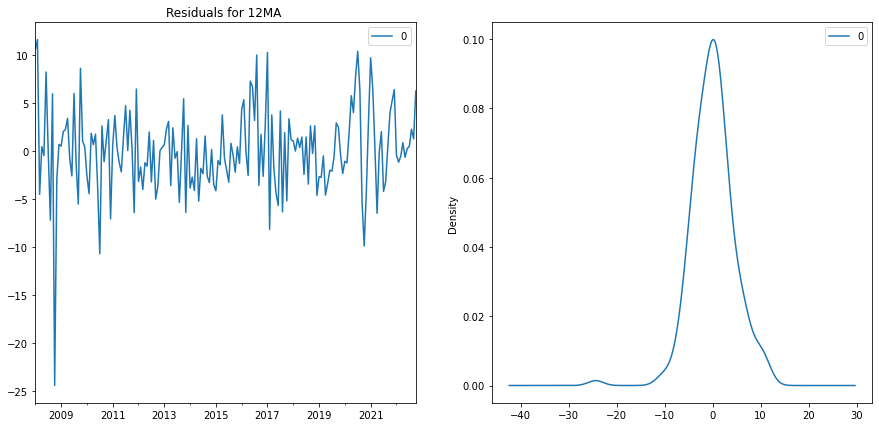

In [126]:
# Plot residual errors
residuals0012 = pd.DataFrame(result12.resid) 
fig, ax = plt.subplots(1,2)
residuals101.plot(title="Residuals for 12MA ", ax=ax[0],figsize=(15,7))
residuals101.plot(kind='kde',ax=ax[1])
plt.show()


In [127]:
##concat all SMA models; 2ma,3ma,12ma

In [128]:
MA = pd.concat([test_data,predicted002,predicted003,predicted12],axis=1)
print(MA)

            Inflation        2MA        3MA       12MA
2022-11-01      13.65  13.718823  13.981716  10.071227
2022-12-01      11.76  13.493918  14.613581   7.694820
2023-01-01       6.83  11.209011  13.186178   6.147343
2023-02-01       6.76  11.209011  11.415005   4.498324
2023-03-01       5.71  11.209011  11.415005   5.271082
2023-04-01       7.20  11.209011  11.415005   8.600758
2023-05-01       9.52  11.209011  11.415005  12.020680
2023-06-01      11.02  11.209011  11.415005  12.905037
2023-07-01      11.45  11.209011  11.415005  13.109064
2023-08-01      11.83  11.209011  11.415005  14.746046
2023-09-01      12.33  11.209011  11.415005  15.773707
2023-10-01      10.85  11.209011  11.415005  13.469375


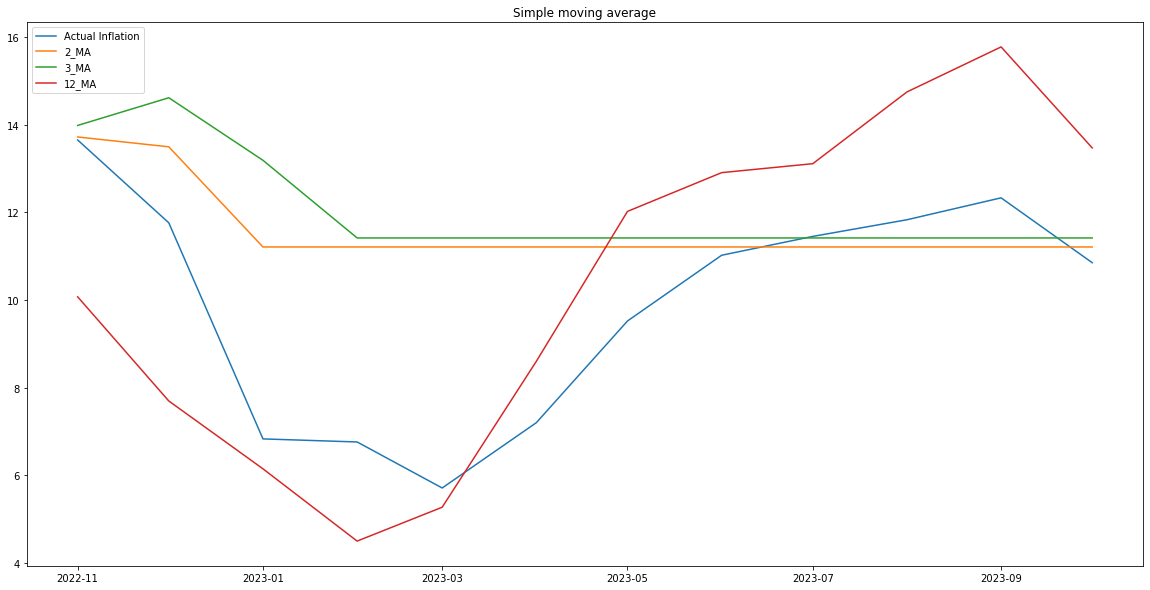

In [129]:
#Plotting actual test data, predictions 
plt.plot(test_data, label='Actual Inflation')
plt.plot(predicted002, label='2_MA')
plt.plot(predicted003, label='3_MA')
plt.plot(predicted12, label='12_MA') 
plt.title('Simple moving average')
plt.legend()
plt.show()


# Naive method

In [130]:
train_len = 178

In [131]:
train = pd.DataFrame(train_data)
test = pd.DataFrame(test_data)

In [132]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Inflation'][train_len-1]

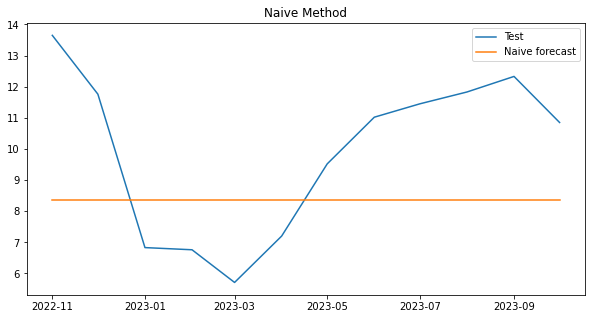

In [133]:
plt.figure(figsize=(10,5))
#plt.plot(train['Inflation'], label='Train')
plt.plot(test['Inflation'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [134]:
y_hat_naive

,Inflation,naive_forecast
date,,
2022-11-01,13.65,8.36
2022-12-01,11.76,8.36
2023-01-01,6.83,8.36
2023-02-01,6.76,8.36
2023-03-01,5.71,8.36
2023-04-01,7.20,8.36
2023-05-01,9.52,8.36
2023-06-01,11.02,8.36
2023-07-01,11.45,8.36


In [135]:
mse_N = mean_squared_error(test['Inflation'], y_hat_naive['naive_forecast']).round(2)
rmse_N = np.sqrt(mean_squared_error(test['Inflation'], y_hat_naive['naive_forecast'])).round(2)

print('MSE', mse_N)
print('RMSE',rmse_N)

MSE 8.73
RMSE 2.96


In [136]:
## Best Model consideration 

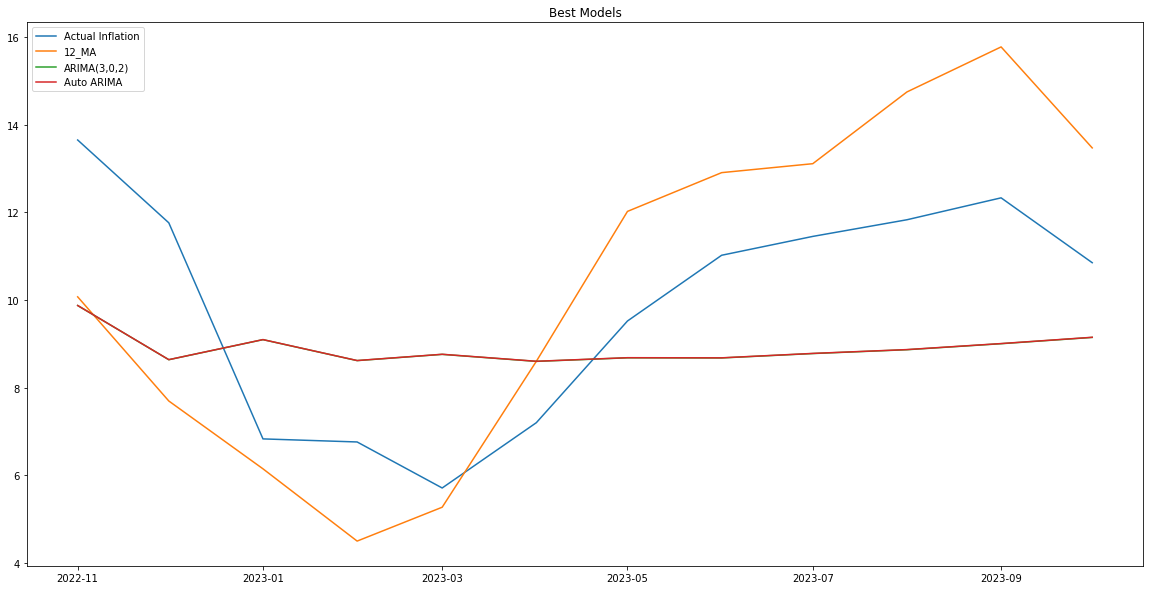

In [137]:
#Plotting actual test data, predictions 
plt.plot(test_data, label='Actual Inflation')
plt.plot(predicted12, label='12_MA') 
plt.plot(predicted_inf302 , label='ARIMA(3,0,2)') 
plt.plot(prediction, label='Auto ARIMA') 
plt.title('Best Models')
plt.legend()
plt.show()


In [138]:
## Chosen model to forecast next 12 months ARIMA (3,0,2)

In [139]:
#retrained model with full data to predict next 12 months 

Finalmodel = ARIMA(NI,order=(0,0,12))
# Training arima modeling 
Infmodel_fitFinal = Finalmodel.fit()
print(Infmodel_fitFinal.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Inflation   No. Observations:                  190
Model:                ARIMA(0, 0, 12)   Log Likelihood                -564.383
Date:                Wed, 01 May 2024   AIC                           1156.766
Time:                        04:18:53   BIC                           1202.224
Sample:                    01-01-2008   HQIC                          1175.180
                         - 10-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2107      8.035      1.395      0.163      -4.538      26.959
ma.L1          1.7524      0.367      4.776      0.000       1.033       2.471
ma.L2          2.3177      0.666      3.479      0.0

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [140]:
finalfcast= Infmodel_fitFinal.get_forecast(steps=12)
predicted_infFinal = finalfcast.predicted_mean


In [141]:
predpred=Finalmodel.fit().predict()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [142]:
predicted_infFinal

2023-11-01     2.033087
2023-12-01    -7.145871
2024-01-01   -13.732559
2024-02-01   -17.208670
2024-03-01   -14.007895
2024-04-01    -2.898789
2024-05-01     9.557748
2024-06-01    15.515285
2024-07-01    14.896806
2024-08-01    13.010454
2024-09-01    12.293819
2024-10-01    10.532069
Freq: MS, Name: predicted_mean, dtype: float64

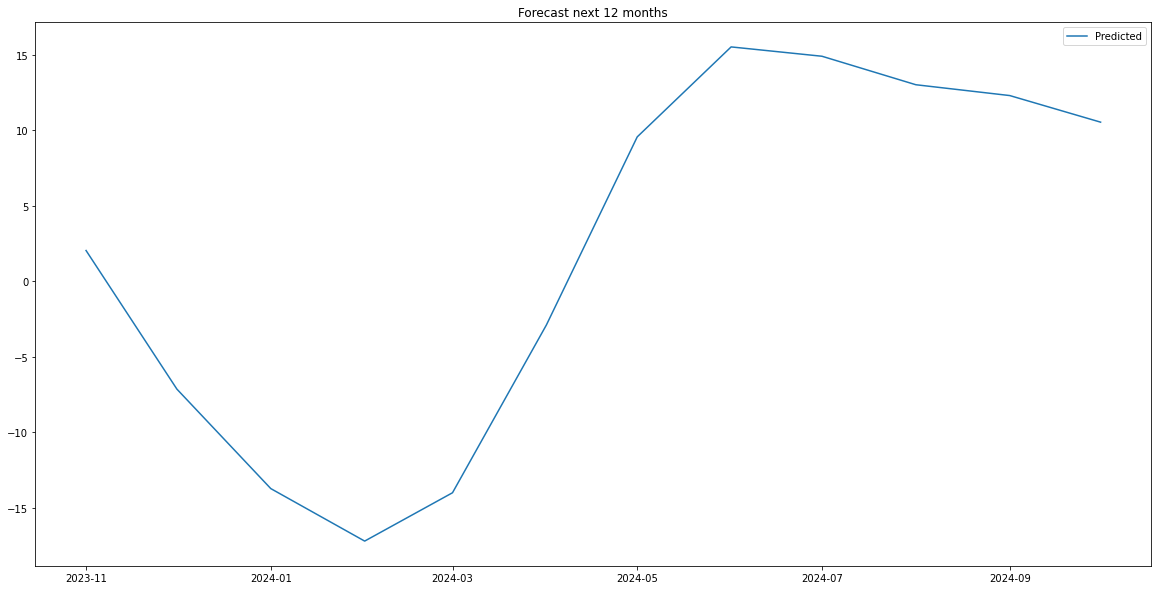

In [143]:
#Plotting Forecast next 12 months

plt.plot(predicted_infFinal, label='Predicted')
plt.title ('Forecast next 12 months')
plt.legend()
plt.show()

In [144]:
finalresult = pd.concat([predicted_infFinal,finalfcast.conf_int()]
                      , axis=1)

In [145]:
finalresult

,predicted_mean,lower Inflation,upper Inflation
2023-11-01,2.033087,-6.872632,10.938807
2023-12-01,-7.145871,-25.130208,10.838466
2024-01-01,-13.732559,-41.125204,13.660087
2024-02-01,-17.208670,-52.709229,18.291889
2024-03-01,-14.007895,-55.781541,27.765751
2024-04-01,-2.898789,-50.113089,44.315510
2024-05-01,9.557748,-42.695749,61.811246
2024-06-01,15.515285,-40.983440,72.014010
2024-07-01,14.896806,-44.055873,73.849485
2024-08-01,13.010454,-46.535436,72.556344


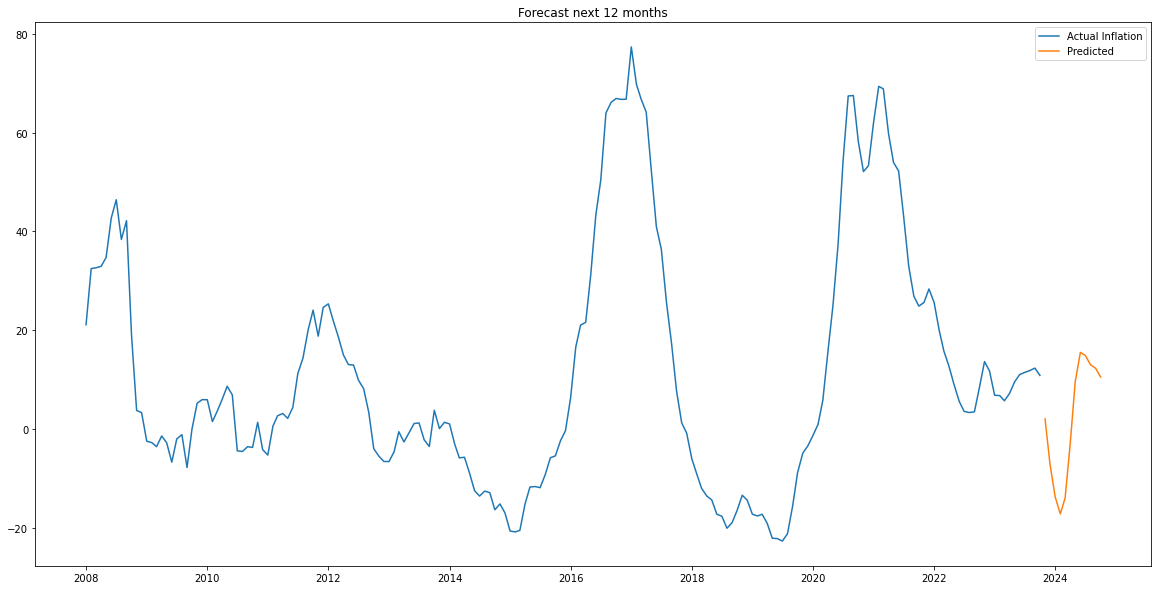

In [146]:
#Plotting all ARIMA predictions against test data 

plt.plot(NI, label='Actual Inflation')
plt.plot(predicted_infFinal, label='Predicted')
plt.title ('Forecast next 12 months')
plt.legend()
plt.show()

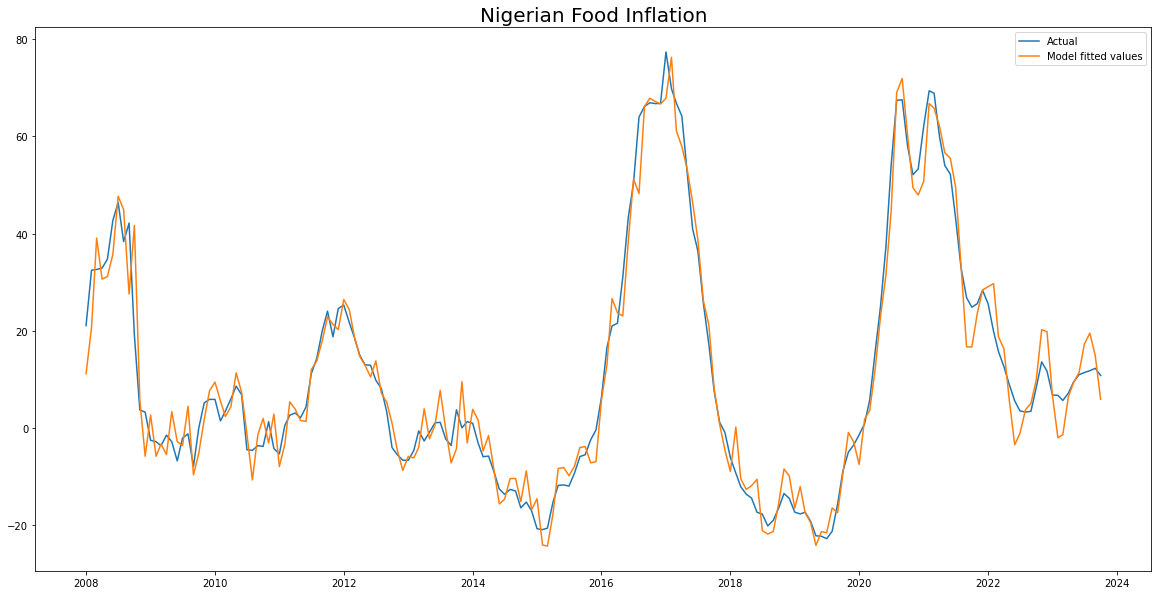

In [147]:

plt.figure(figsize=(20,10))
plt.plot(NI, label="Actual")
plt.plot(predpred, label="Model fitted values")
plt.title('Nigerian Food Inflation', fontsize=20)
plt.legend()

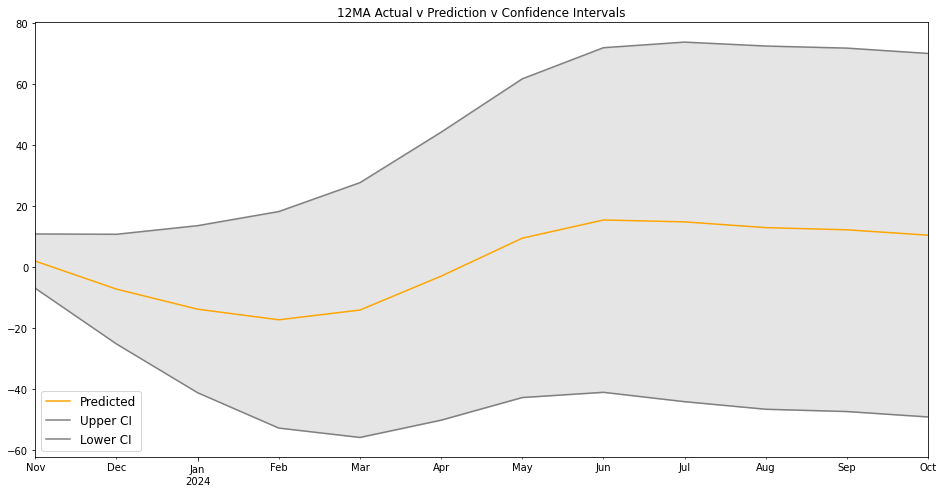

In [148]:
# make a plot of model fit
# Narrow confidence interval better precision

fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(111)


x = finalresult.index.values


upper = finalresult['upper Inflation']
lower = finalresult['lower Inflation']

#finalresult['Inflation'].plot(color = 'blue', label = 'Actual')
finalresult['predicted_mean'].plot(color = 'orange',label = 'Predicted' )
upper.plot(color = 'grey', label = 'Upper CI')
lower.plot(color = 'grey', label = 'Lower CI')

# plot the legend for the first plot
plt.legend(loc = 'lower left', fontsize = 12)


# fill between the conf intervals
plt.fill_between(x, lower, upper, color='grey', alpha= 0.2)
plt.title('12MA Actual v Prediction v Confidence Intervals')

plt.show()

In [ ]:
## End 